In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import warnings
warnings.filterwarnings("ignore")


In [3]:
import numpy as np
import pandas as pd 

In [4]:
import sys
sys.path.append('../../../')

In [5]:
import matplotlib.pyplot as plt 

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [7]:
from src.utils.dates import get_nyse_business_dates

In [8]:
from research.metrics import get_features_responses_correlation
from research.plots import plot_bin_summary_of_xy

In [9]:
from src.settings import Settings

In [10]:
from src.utils.io.read import PreprocessedDataReader

In [11]:
from src.preprocessing.base import FutureTicker

In [12]:
pdr = PreprocessedDataReader(Settings.historical.paths.PREPROCESSED_DATA_PATH)                    

In [13]:
dataset = pdr.read_dataset(ticker=FutureTicker.BRENT)

In [14]:
dataset.shape

(757, 81)

In [15]:
dataset.tail(2)

,tradeDate,Name,Commercial_NetPosition,CommercialLongPosition,CommercialShortPosition,ManagedMoney_NetPosition,ManagedMoney_LongPosition,ManagedMoney_ShortPosition,Commercial_NetPosition_change,prior_report_Commercial_NetPosition_change,...,prior_cumulative_5D_F2_Volume_change,next_prior_cumulative_5D_F2_Volume_change,prior_cumulative_5D_F1MinusF2_Volume_change,next_prior_cumulative_5D_F1MinusF2_Volume_change,F1_RolledPrice_change,next_F1_RolledPrice_change,F2_RolledPrice_change,next_F2_RolledPrice_change,F3_RolledPrice_change,next_F3_RolledPrice_change
755,2025-06-24,CO,-432876.0,1189626.0,1622502.0,-6746.0,498013.0,504759.0,39743.0,-73318.0,...,-53127.0,-1301754.0,-766204.0,-726115.0,-9.31,0.94,-8.73,0.94,-8.32,0.85
756,2025-07-01,CO,-427357.0,1092550.0,1519907.0,-8225.0,475395.0,483620.0,5519.0,39743.0,...,-1301754.0,NaN,-726115.0,NaN,0.94,NaN,0.94,NaN,0.85,NaN


In [16]:
dataset.columns.tolist()

['tradeDate',
 'Name',
 'Commercial_NetPosition',
 'CommercialLongPosition',
 'CommercialShortPosition',
 'ManagedMoney_NetPosition',
 'ManagedMoney_LongPosition',
 'ManagedMoney_ShortPosition',
 'Commercial_NetPosition_change',
 'prior_report_Commercial_NetPosition_change',
 'forward_report_Commercial_NetPosition_change',
 'CommercialLongPosition_change',
 'prior_report_CommercialLongPosition_change',
 'forward_report_CommercialLongPosition_change',
 'CommercialShortPosition_change',
 'prior_report_CommercialShortPosition_change',
 'forward_report_CommercialShortPosition_change',
 'ManagedMoney_NetPosition_change',
 'prior_report_ManagedMoney_NetPosition_change',
 'forward_report_ManagedMoney_NetPosition_change',
 'ManagedMoney_LongPosition_change',
 'prior_report_ManagedMoney_LongPosition_change',
 'forward_report_ManagedMoney_LongPosition_change',
 'ManagedMoney_ShortPosition_change',
 'prior_report_ManagedMoney_ShortPosition_change',
 'forward_report_ManagedMoney_ShortPosition_chan

In [17]:
dataset['Commercial_NetPosition'].describe()

count       757.000000
mean    -406194.019815
std      202484.353988
min     -949089.000000
25%     -561322.000000
50%     -353317.000000
75%     -260809.000000
max      -16110.000000
Name: Commercial_NetPosition, dtype: float64

In [18]:
dataset['ManagedMoney_NetPosition'].describe()

count       757.000000
mean      91411.809775
std      132752.740601
min     -294812.000000
25%        7527.000000
50%       75283.000000
75%      151150.000000
max      508872.000000
Name: ManagedMoney_NetPosition, dtype: float64

In [19]:
np.sum(dataset['ManagedMoney_LongPosition'] <= dataset['ManagedMoney_ShortPosition'])

np.int64(178)

In [20]:
dataset['tradeDate'] = pd.to_datetime(dataset['tradeDate']).dt.date

In [21]:
dataset.sort_values(by = 'tradeDate', ascending = True, inplace=True)

In [22]:
dataset.columns.tolist()

['tradeDate',
 'Name',
 'Commercial_NetPosition',
 'CommercialLongPosition',
 'CommercialShortPosition',
 'ManagedMoney_NetPosition',
 'ManagedMoney_LongPosition',
 'ManagedMoney_ShortPosition',
 'Commercial_NetPosition_change',
 'prior_report_Commercial_NetPosition_change',
 'forward_report_Commercial_NetPosition_change',
 'CommercialLongPosition_change',
 'prior_report_CommercialLongPosition_change',
 'forward_report_CommercialLongPosition_change',
 'CommercialShortPosition_change',
 'prior_report_CommercialShortPosition_change',
 'forward_report_CommercialShortPosition_change',
 'ManagedMoney_NetPosition_change',
 'prior_report_ManagedMoney_NetPosition_change',
 'forward_report_ManagedMoney_NetPosition_change',
 'ManagedMoney_LongPosition_change',
 'prior_report_ManagedMoney_LongPosition_change',
 'forward_report_ManagedMoney_LongPosition_change',
 'ManagedMoney_ShortPosition_change',
 'prior_report_ManagedMoney_ShortPosition_change',
 'forward_report_ManagedMoney_ShortPosition_chan

In [23]:
from research.model_selection.CombinatorialPurgedCV import CombinatorialPurgedCV
from research.model_selection.CombinatorialPurgedCV import cpcv_predict



In [24]:

from sklearn.linear_model import LinearRegression, ElasticNetCV
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor


In [25]:
?CombinatorialPurgedCV

Init signature: CombinatorialPurgedCV(n_partitions: int, k: int, purge_amount: int)
Docstring:     
Combinatorial Purged Cross-Validatpr with Purging

This class identifies training and testing indicies that split the data into train/test sets. It also implements purging to avoid lookahead bias.
Init docstring:
Args:
:param n_partitions: the total number of partitions
:param k: the number of partitions to include in the test set
:param purge_amount: the number of indices to be purged between train/test sets
File:           ~/Documents/Projects/omroot_repos/COTAME/research/model_selection/CombinatorialPurgedCV.py
Type:           type
Subclasses:     

In [26]:
response_names =  ['ManagedMoney_NetPosition_to_openinterest_change',
                'ManagedMoney_LongPosition_to_openinterest_change',
                'ManagedMoney_ShortPosition_to_openinterest_change'] 



In [27]:
cv = CombinatorialPurgedCV(n_partitions=10,
                           k=2,
                           purge_amount=10)

In [28]:
import json

In [29]:
with open("br_cot_mm_nowcast_selected_features_by_response.json", "r") as f:
    selected_features_by_response = json.load(f)

In [30]:
selected_features_by_response

{'ManagedMoney_NetPosition_change': ['prior_report_ManagedMoney_LongPosition_change',
  'prior_report_ManagedMoney_NetPosition_to_openinterest_change',
  'F1_RolledPrice_change'],
 'ManagedMoney_LongPosition_change': ['prior_report_ManagedMoney_ShortPosition_to_openinterest_change',
  'prior_cumulative_5D_F2_Volume_change',
  'prior_cumulative_5D_F1MinusF2_Volume_change',
  'prior_5D_AGG_OI_change',
  'F1_RolledPrice_change'],
 'ManagedMoney_ShortPosition_change': ['prior_report_ManagedMoney_ShortPosition_change',
  'prior_report_SyntheticF1MinusF2_RolledPrice_change',
  'prior_5D_F2_OI_change',
  'prior_5D_AGG_OI_change',
  'F2_RolledPrice_change'],
 'ManagedMoney_NetPosition_to_openinterest_change': ['prior_report_ManagedMoney_NetPosition_to_openinterest_change',
  'prior_report_ManagedMoney_LongPosition_to_openinterest_change',
  'F1_RolledPrice_change'],
 'ManagedMoney_LongPosition_to_openinterest_change': ['prior_report_ManagedMoney_ShortPosition_to_openinterest_change',
  'prior_

In [31]:
from src.preprocessing.base import Winsorizer

In [32]:
import numpy as np
import pandas as pd
from scipy.stats.mstats import winsorize
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [33]:
from sklearn.linear_model import SGDRegressor, Lasso, LinearRegression, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, HistGradientBoostingRegressor

estimators_  = {
    # Elastic-net via SGD (fast, online)
    "enet": SGDRegressor(
        penalty="elasticnet",
        alpha=1e-4,
        l1_ratio=0.15,
        loss="squared_error",   # or "huber" for robustness
        max_iter=1000,
        tol=1e-3,
        random_state=42
    ),
    # Classic L1 / OLS / L2
    "lasso": Lasso(alpha=1.0, random_state=42),
    "ols": LinearRegression(),
    "ridge": Ridge(alpha=1.0, random_state=42),

    # Tree-based regressors
    "rf": RandomForestRegressor(n_estimators=250, max_depth=10, random_state=42),
    "extra": ExtraTreesRegressor(n_estimators=250, max_depth=10, random_state=42),
    "hgbm": HistGradientBoostingRegressor(max_iter=150, learning_rate=0.001, random_state=42),
}


In [34]:
from __future__ import annotations
import numpy as np
import optuna
from optuna import pruners
from research.model_selection.evaluation import find_best_model

responses_best_model = {}
responses_best_params = {}
responses_study = {}
responses_best_per_model = {}

for (response_name, feature_names) in selected_features_by_response.items():
    best_model, best_params, study, best_per_model = find_best_model(
                        Xy=dataset,
                        feature_names=feature_names,
                        response_name=response_name,
                        cv=cv,
                        n_trials=80,         # bump this as you like
                        n_jobs_cpcv=10,
                        seed=42
                    )
    responses_best_model[response_name]=best_model
    responses_best_params[response_name]=best_params
    responses_study[response_name]=study
    responses_best_per_model[response_name]=best_per_model
    
    print("Overall Best Params:", best_params)
    print("\nBest Per Model:")
    for model, info in best_per_model.items():
        print(f"{model}: score={info['score']:.4f}, params={info['params']}")

[I 2025-08-20 19:31:17,989] A new study created in memory with name: no-name-128a1aa0-b07d-4e98-860b-0bd28eade9b3
Best trial: 0. Best value: 0.441404:   1%|       | 1/80 [00:01<02:27,  1.87s/it]

[I 2025-08-20 19:31:19,860] Trial 0 finished with value: 0.4414037598311028 and parameters: {'model': 'lasso', 'alpha': 1.156732719914599}. Best is trial 0 with value: 0.4414037598311028.
[I 2025-08-20 19:31:19,905] Trial 1 finished with value: 0.44140166506760997 and parameters: {'model': 'ridge', 'alpha': 4.473429410462694e-05}. Best is trial 0 with value: 0.4414037598311028.


Best trial: 2. Best value: 0.537204:   4%|▎      | 3/80 [00:05<02:11,  1.71s/it]

[I 2025-08-20 19:31:23,176] Trial 2 finished with value: 0.5372035117325217 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.5372035117325217.


Best trial: 2. Best value: 0.537204:  10%|▋      | 8/80 [00:05<00:30,  2.36it/s]

[I 2025-08-20 19:31:23,422] Trial 3 finished with value: 0.49360128790532537 and parameters: {'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}. Best is trial 2 with value: 0.5372035117325217.
[I 2025-08-20 19:31:23,455] Trial 4 finished with value: 0.44140317619294317 and parameters: {'model': 'ridge', 'alpha': 0.047930525507821314}. Best is trial 2 with value: 0.5372035117325217.
[I 2025-08-20 19:31:23,482] Trial 5 finished with value: 0.441401663654931 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.5372035117325217.
[I 2025-08-20 19:31:23,512] Trial 6 finished with value: 0.41329213123783154 and parameters: {'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}. Best is trial 2 with value: 0.5372035117325217.
[I 2025-08-20 19:31:23,543] Trial 7 finished with value: 0.441401663654931 and para

Best trial: 2. Best value: 0.537204:  12%|▊     | 10/80 [00:05<00:23,  2.98it/s]

[I 2025-08-20 19:31:23,807] Trial 8 finished with value: 0.5169027761692849 and parameters: {'model': 'hgbm', 'learning_rate': 0.03499331111708852, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.3109823217156622, 'max_leaf_nodes': 93}. Best is trial 2 with value: 0.5372035117325217.
[I 2025-08-20 19:31:23,838] Trial 9 finished with value: 0.441401663654931 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.5372035117325217.


Best trial: 2. Best value: 0.537204:  12%|▊     | 10/80 [00:08<00:23,  2.98it/s]

[I 2025-08-20 19:31:26,859] Trial 10 finished with value: 0.5371938964225822 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 27, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.5372035117325217.


Best trial: 2. Best value: 0.537204:  15%|▉     | 12/80 [00:12<01:23,  1.23s/it]

[I 2025-08-20 19:31:30,216] Trial 11 finished with value: 0.5371938964225822 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.5372035117325217.


Best trial: 2. Best value: 0.537204:  16%|▉     | 13/80 [00:15<01:44,  1.57s/it]

[I 2025-08-20 19:31:33,259] Trial 12 finished with value: 0.5371938964225822 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 22, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.5372035117325217.


Best trial: 2. Best value: 0.537204:  18%|█     | 14/80 [00:16<01:42,  1.56s/it]

[I 2025-08-20 19:31:34,779] Trial 13 finished with value: 0.48699380495386035 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 19, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 2 with value: 0.5372035117325217.


Best trial: 14. Best value: 0.538766:  19%|▉    | 15/80 [00:22<02:45,  2.54s/it]

[I 2025-08-20 19:31:40,627] Trial 14 finished with value: 0.5387657858738736 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 14, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.5387657858738736.


Best trial: 15. Best value: 0.538794:  20%|█    | 16/80 [00:28<03:37,  3.39s/it]

[I 2025-08-20 19:31:46,623] Trial 15 finished with value: 0.53879366823392 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 12, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 15 with value: 0.53879366823392.


Best trial: 15. Best value: 0.538794:  22%|█▏   | 18/80 [00:34<04:09,  4.03s/it]

[I 2025-08-20 19:31:52,466] Trial 16 finished with value: 0.5387731879253582 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 13, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 15 with value: 0.53879366823392.
[I 2025-08-20 19:31:52,512] Trial 17 finished with value: 0.43885584973961306 and parameters: {'model': 'enet', 'alpha': 1.1633263858100045e-06, 'l1_ratio': 0.9653379460654555, 'loss': 'squared_error'}. Best is trial 15 with value: 0.53879366823392.
[I 2025-08-20 19:31:52,544] Trial 18 finished with value: 0.4414269673336815 and parameters: {'model': 'lasso', 'alpha': 9.714586134002047}. Best is trial 15 with value: 0.53879366823392.


Best trial: 15. Best value: 0.538794:  25%|█▎   | 20/80 [00:37<02:27,  2.46s/it]

[I 2025-08-20 19:31:55,603] Trial 19 finished with value: 0.4874133531423002 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 11, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 15 with value: 0.53879366823392.


Best trial: 15. Best value: 0.538794:  26%|█▎   | 21/80 [00:42<02:49,  2.87s/it]

[I 2025-08-20 19:32:00,138] Trial 20 finished with value: 0.5335008677906117 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 3, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 15 with value: 0.53879366823392.


Best trial: 15. Best value: 0.538794:  28%|█▍   | 22/80 [00:48<03:33,  3.68s/it]

[I 2025-08-20 19:32:06,619] Trial 21 finished with value: 0.5387657858738736 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 14, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 15 with value: 0.53879366823392.


Best trial: 15. Best value: 0.538794:  29%|█▍   | 23/80 [00:53<03:49,  4.02s/it]

[I 2025-08-20 19:32:11,717] Trial 22 finished with value: 0.5386636594144235 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 11, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 15 with value: 0.53879366823392.


Best trial: 23. Best value: 0.539124:  30%|█▌   | 24/80 [00:54<03:02,  3.27s/it]

[I 2025-08-20 19:32:12,797] Trial 23 finished with value: 0.5391241449131264 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 19, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 23 with value: 0.5391241449131264.


Best trial: 23. Best value: 0.539124:  31%|█▌   | 25/80 [00:55<02:27,  2.68s/it]

[I 2025-08-20 19:32:13,889] Trial 24 finished with value: 0.5382032160888328 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 19, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 23 with value: 0.5391241449131264.


Best trial: 23. Best value: 0.539124:  32%|█▋   | 26/80 [00:57<02:01,  2.25s/it]

[I 2025-08-20 19:32:15,019] Trial 25 finished with value: 0.5349393651795625 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 21, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 23 with value: 0.5391241449131264.


Best trial: 23. Best value: 0.539124:  34%|█▋   | 27/80 [01:02<02:52,  3.26s/it]/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximu

[I 2025-08-20 19:32:20,835] Trial 26 finished with value: 0.5251567851233767 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 11, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 23 with value: 0.5391241449131264.


o improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before converg

[I 2025-08-20 19:32:21,262] Trial 27 finished with value: 0.45141511633066966 and parameters: {'model': 'enet', 'alpha': 7.894103404616828e-05, 'l1_ratio': 0.037369388237146195, 'loss': 'huber', 'epsilon': 0.19255826811040527}. Best is trial 23 with value: 0.5391241449131264.
[I 2025-08-20 19:32:21,295] Trial 28 finished with value: 0.44262196113699714 and parameters: {'model': 'ridge', 'alpha': 442.5093801422389}. Best is trial 23 with value: 0.5391241449131264.
[I 2025-08-20 19:32:21,329] Trial 29 finished with value: 0.4414016626759298 and parameters: {'model': 'lasso', 'alpha': 0.0007305754446019548}. Best is trial 23 with value: 0.5391241449131264.


Best trial: 23. Best value: 0.539124:  39%|█▉   | 31/80 [01:04<01:03,  1.30s/it]

[I 2025-08-20 19:32:22,382] Trial 30 finished with value: 0.479236394785161 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 17, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 23 with value: 0.5391241449131264.


Best trial: 23. Best value: 0.539124:  40%|██   | 32/80 [01:10<01:51,  2.32s/it]

[I 2025-08-20 19:32:28,554] Trial 31 finished with value: 0.5387731879253582 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 13, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 23 with value: 0.5391241449131264.


Best trial: 23. Best value: 0.539124:  41%|██   | 33/80 [01:15<02:21,  3.01s/it]

[I 2025-08-20 19:32:33,887] Trial 32 finished with value: 0.5382914999135694 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 12, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 23 with value: 0.5391241449131264.


Best trial: 23. Best value: 0.539124:  42%|██▏  | 34/80 [01:21<02:51,  3.73s/it]

[I 2025-08-20 19:32:39,827] Trial 33 finished with value: 0.5384987400762334 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 8, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 23 with value: 0.5391241449131264.


Best trial: 23. Best value: 0.539124:  44%|██▏  | 35/80 [01:24<02:39,  3.55s/it]

[I 2025-08-20 19:32:42,848] Trial 34 finished with value: 0.5192020701811051 and parameters: {'model': 'hgbm', 'learning_rate': 0.002743023307727101, 'max_depth': 13, 'max_iter': 1000, 'l2_regularization': 0.054917552055816055, 'max_leaf_nodes': 255}. Best is trial 23 with value: 0.5391241449131264.


Best trial: 23. Best value: 0.539124:  46%|██▎  | 37/80 [01:28<02:38,  3.69s/it]

[I 2025-08-20 19:32:46,930] Trial 35 finished with value: 0.5390864366579846 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 16, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 23 with value: 0.5391241449131264.
[I 2025-08-20 19:32:46,963] Trial 36 finished with value: 0.4414091092870894 and parameters: {'model': 'ridge', 'alpha': 906.6118860721004}. Best is trial 23 with value: 0.5391241449131264.
[I 2025-08-20 19:32:46,995] Trial 37 finished with value: 0.4414016636527224 and parameters: {'model': 'lasso', 'alpha': 1.261122987665929e-06}. Best is trial 23 with value: 0.5391241449131264.


Best trial: 23. Best value: 0.539124:  49%|██▍  | 39/80 [01:33<01:40,  2.45s/it]

[I 2025-08-20 19:32:51,097] Trial 38 finished with value: 0.5385668855127662 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 17, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 23 with value: 0.5391241449131264.


Best trial: 23. Best value: 0.539124:  50%|██▌  | 40/80 [01:35<01:36,  2.42s/it]

[I 2025-08-20 19:32:53,369] Trial 39 finished with value: 0.5266871905044338 and parameters: {'model': 'hgbm', 'learning_rate': 0.0011976520841200263, 'max_depth': 10, 'max_iter': 800, 'l2_regularization': 0.9664981016783335, 'max_leaf_nodes': 21}. Best is trial 23 with value: 0.5391241449131264.
[I 2025-08-20 19:32:53,400] Trial 40 finished with value: 0.441401663654931 and parameters: {'model': 'ols'}. Best is trial 23 with value: 0.5391241449131264.


Best trial: 23. Best value: 0.539124:  52%|██▋  | 42/80 [01:41<01:39,  2.61s/it]

[I 2025-08-20 19:32:59,232] Trial 41 finished with value: 0.5387661944801022 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 16, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 23 with value: 0.5391241449131264.


Best trial: 23. Best value: 0.539124:  54%|██▋  | 43/80 [01:45<01:46,  2.89s/it]

[I 2025-08-20 19:33:03,190] Trial 42 finished with value: 0.5390858204780785 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 19, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 23 with value: 0.5391241449131264.


Best trial: 23. Best value: 0.539124:  55%|██▊  | 44/80 [01:49<01:54,  3.17s/it]

[I 2025-08-20 19:33:07,313] Trial 43 finished with value: 0.5385668855127662 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 23, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 23 with value: 0.5391241449131264.


Best trial: 23. Best value: 0.539124:  56%|██▊  | 45/80 [01:53<01:58,  3.38s/it]

[I 2025-08-20 19:33:11,346] Trial 44 finished with value: 0.5390858204780784 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 18, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 23 with value: 0.5391241449131264.


Best trial: 23. Best value: 0.539124:  61%|███  | 49/80 [01:57<00:53,  1.71s/it]

[I 2025-08-20 19:33:15,493] Trial 45 finished with value: 0.5385668855127662 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 19, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 23 with value: 0.5391241449131264.
[I 2025-08-20 19:33:15,537] Trial 46 finished with value: 0.4416993970783164 and parameters: {'model': 'ridge', 'alpha': 10.98513769813624}. Best is trial 23 with value: 0.5391241449131264.
[I 2025-08-20 19:33:15,568] Trial 47 finished with value: 0.441401663654931 and parameters: {'model': 'ols'}. Best is trial 23 with value: 0.5391241449131264.
[I 2025-08-20 19:33:15,616] Trial 48 finished with value: 0.43885585369447166 and parameters: {'model': 'enet', 'alpha': 1.2227515943728377e-05, 'l1_ratio': 0.9780768138793394, 'loss': 'squared_error'}. Best is trial 23 with value: 0.5391241449131264.


Best trial: 23. Best value: 0.539124:  62%|███▏ | 50/80 [02:01<01:06,  2.23s/it]

[I 2025-08-20 19:33:19,886] Trial 49 finished with value: 0.5364681834964821 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 20, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 23 with value: 0.5391241449131264.


Best trial: 50. Best value: 0.539544:  64%|███▏ | 51/80 [02:03<01:03,  2.19s/it]

[I 2025-08-20 19:33:21,969] Trial 50 finished with value: 0.5395439377324778 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 24, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 50 with value: 0.5395439377324778.


Best trial: 50. Best value: 0.539544:  65%|███▎ | 52/80 [02:06<01:00,  2.17s/it]

[I 2025-08-20 19:33:24,057] Trial 51 finished with value: 0.5395439377324778 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 24, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 50 with value: 0.5395439377324778.


Best trial: 50. Best value: 0.539544:  66%|███▎ | 53/80 [02:08<00:58,  2.16s/it]

[I 2025-08-20 19:33:26,203] Trial 52 finished with value: 0.5386739557599809 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 24, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 50 with value: 0.5395439377324778.


Best trial: 50. Best value: 0.539544:  68%|███▍ | 54/80 [02:10<00:56,  2.16s/it]

[I 2025-08-20 19:33:28,361] Trial 53 finished with value: 0.5395439377324778 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 25, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 50 with value: 0.5395439377324778.


Best trial: 50. Best value: 0.539544:  69%|███▍ | 55/80 [02:12<00:53,  2.15s/it]

[I 2025-08-20 19:33:30,496] Trial 54 finished with value: 0.5386739557599809 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 26, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 50 with value: 0.5395439377324778.


Best trial: 50. Best value: 0.539544:  70%|███▌ | 56/80 [02:14<00:51,  2.13s/it]

[I 2025-08-20 19:33:32,571] Trial 55 finished with value: 0.5395439377324778 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 25, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 50 with value: 0.5395439377324778.


Best trial: 50. Best value: 0.539544:  71%|███▌ | 57/80 [02:15<00:41,  1.82s/it]

[I 2025-08-20 19:33:33,629] Trial 56 finished with value: 0.47179255201268944 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 26, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 50 with value: 0.5395439377324778.


Best trial: 50. Best value: 0.539544:  72%|███▋ | 58/80 [02:16<00:34,  1.57s/it]

[I 2025-08-20 19:33:34,594] Trial 57 finished with value: 0.5264723576531 and parameters: {'model': 'hgbm', 'learning_rate': 0.006419588568815613, 'max_depth': 5, 'max_iter': 400, 'l2_regularization': 0.584457419124367, 'max_leaf_nodes': 255}. Best is trial 50 with value: 0.5395439377324778.


Best trial: 50. Best value: 0.539544:  74%|███▋ | 59/80 [02:17<00:30,  1.44s/it]

[I 2025-08-20 19:33:35,720] Trial 58 finished with value: 0.5382032160888328 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 29, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 50 with value: 0.5395439377324778.


Best trial: 50. Best value: 0.539544:  75%|███▊ | 60/80 [02:19<00:32,  1.64s/it]

[I 2025-08-20 19:33:37,834] Trial 59 finished with value: 0.5368479760991142 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 24, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 50 with value: 0.5395439377324778.
[I 2025-08-20 19:33:37,879] Trial 60 finished with value: 0.44140166153712124 and parameters: {'model': 'lasso', 'alpha': 0.0014523663772718597}. Best is trial 50 with value: 0.5395439377324778.


Best trial: 50. Best value: 0.539544:  78%|███▉ | 62/80 [02:21<00:24,  1.37s/it]

[I 2025-08-20 19:33:39,954] Trial 61 finished with value: 0.5395439377324778 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 27, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 50 with value: 0.5395439377324778.


Best trial: 50. Best value: 0.539544:  79%|███▉ | 63/80 [02:24<00:26,  1.55s/it]

[I 2025-08-20 19:33:42,020] Trial 62 finished with value: 0.5395439377324778 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 27, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 50 with value: 0.5395439377324778.


Best trial: 50. Best value: 0.539544:  80%|████ | 64/80 [02:26<00:27,  1.71s/it]

[I 2025-08-20 19:33:44,205] Trial 63 finished with value: 0.5372306928616105 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 28, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 50 with value: 0.5395439377324778.


Best trial: 50. Best value: 0.539544:  81%|████ | 65/80 [02:27<00:23,  1.55s/it]

[I 2025-08-20 19:33:45,336] Trial 64 finished with value: 0.5391241449131264 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 26, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 50 with value: 0.5395439377324778.
[I 2025-08-20 19:33:45,378] Trial 65 finished with value: 0.43885589695679494 and parameters: {'model': 'enet', 'alpha': 7.1036572377489855e-06, 'l1_ratio': 0.5857926674877615, 'loss': 'squared_error'}. Best is trial 50 with value: 0.5395439377324778.


Best trial: 50. Best value: 0.539544:  84%|████▏| 67/80 [02:30<00:20,  1.56s/it]

[I 2025-08-20 19:33:48,455] Trial 66 finished with value: 0.5388623958930556 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 24, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 50 with value: 0.5395439377324778.


Best trial: 50. Best value: 0.539544:  85%|████▎| 68/80 [02:32<00:20,  1.70s/it]

[I 2025-08-20 19:33:50,636] Trial 67 finished with value: 0.5372306928616105 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 30, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 50 with value: 0.5395439377324778.


Best trial: 50. Best value: 0.539544:  86%|████▎| 69/80 [02:36<00:24,  2.19s/it]

[I 2025-08-20 19:33:54,249] Trial 68 finished with value: 0.5325006633111027 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 27, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 50 with value: 0.5395439377324778.


Best trial: 50. Best value: 0.539544:  88%|████▍| 70/80 [02:37<00:18,  1.88s/it]

[I 2025-08-20 19:33:55,272] Trial 69 finished with value: 0.4619085477990481 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 22, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 50 with value: 0.5395439377324778.


Best trial: 50. Best value: 0.539544:  89%|████▍| 71/80 [02:38<00:15,  1.68s/it]

[I 2025-08-20 19:33:56,432] Trial 70 finished with value: 0.5391241449131264 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 25, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 50 with value: 0.5395439377324778.


Best trial: 50. Best value: 0.539544:  90%|████▌| 72/80 [02:39<00:12,  1.55s/it]

[I 2025-08-20 19:33:57,643] Trial 71 finished with value: 0.5391241449131264 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 27, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 50 with value: 0.5395439377324778.


Best trial: 50. Best value: 0.539544:  91%|████▌| 73/80 [02:40<00:10,  1.43s/it]

[I 2025-08-20 19:33:58,794] Trial 72 finished with value: 0.5391241449131264 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 28, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 50 with value: 0.5395439377324778.
[I 2025-08-20 19:33:58,823] Trial 73 finished with value: 0.441401663654931 and parameters: {'model': 'ols'}. Best is trial 50 with value: 0.5395439377324778.


Best trial: 50. Best value: 0.539544:  94%|████▋| 75/80 [02:42<00:06,  1.26s/it]

[I 2025-08-20 19:34:00,874] Trial 74 finished with value: 0.5386739557599809 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 25, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 50 with value: 0.5395439377324778.
[I 2025-08-20 19:34:00,918] Trial 75 finished with value: 0.44140936766075456 and parameters: {'model': 'ridge', 'alpha': 0.24484442397601325}. Best is trial 50 with value: 0.5395439377324778.


Best trial: 50. Best value: 0.539544:  96%|████▊| 77/80 [02:44<00:02,  1.01it/s]

[I 2025-08-20 19:34:02,005] Trial 76 finished with value: 0.5391241449131264 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 26, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 50 with value: 0.5395439377324778.


Best trial: 50. Best value: 0.539544:  98%|████▉| 78/80 [02:47<00:02,  1.45s/it]

[I 2025-08-20 19:34:05,112] Trial 77 finished with value: 0.5388623958930556 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 22, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 50 with value: 0.5395439377324778.


Best trial: 50. Best value: 0.539544: 100%|█████| 80/80 [02:49<00:00,  2.12s/it]
[I 2025-08-20 19:34:07,246] A new study created in memory with name: no-name-2bd29cea-e70d-4e6f-910e-255b0def0697


[I 2025-08-20 19:34:07,195] Trial 78 finished with value: 0.5386739557599809 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 28, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 50 with value: 0.5395439377324778.
[I 2025-08-20 19:34:07,239] Trial 79 finished with value: 0.4414016631226007 and parameters: {'model': 'lasso', 'alpha': 0.0003820864791223947}. Best is trial 50 with value: 0.5395439377324778.
Overall Best Params: {'model': 'rf', 'n_estimators': 400, 'max_depth': 24, 'min_samples_leaf': 10, 'max_features': 'log2'}

Best Per Model:
lasso: score=0.4414, params={'model': 'lasso', 'alpha': 0.0014523663772718597}
ridge: score=0.4414, params={'model': 'ridge', 'alpha': 4.473429410462694e-05}
rf: score=0.5252, params={'model': 'rf', 'n_estimators': 1000, 'max_depth': 11, 'min_samples_leaf': 1, 'max_features': 'log2'}
hgbm: score=0.4936, params={'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 

Best trial: 1. Best value: 0.475471:   1%|       | 1/80 [00:00<00:05, 14.24it/s]

[I 2025-08-20 19:34:07,287] Trial 0 finished with value: 0.47546041225395574 and parameters: {'model': 'lasso', 'alpha': 1.156732719914599}. Best is trial 0 with value: 0.47546041225395574.
[I 2025-08-20 19:34:07,316] Trial 1 finished with value: 0.4754711073160693 and parameters: {'model': 'ridge', 'alpha': 4.473429410462694e-05}. Best is trial 1 with value: 0.4754711073160693.


Best trial: 2. Best value: 0.534018:   4%|▎      | 3/80 [00:03<01:38,  1.28s/it]

[I 2025-08-20 19:34:11,090] Trial 2 finished with value: 0.5340182240017687 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.5340182240017687.


Best trial: 2. Best value: 0.534018:   9%|▌      | 7/80 [00:04<00:31,  2.35it/s]

[I 2025-08-20 19:34:11,386] Trial 3 finished with value: 0.5301066794216666 and parameters: {'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}. Best is trial 2 with value: 0.5340182240017687.
[I 2025-08-20 19:34:11,429] Trial 4 finished with value: 0.4754714246866984 and parameters: {'model': 'ridge', 'alpha': 0.047930525507821314}. Best is trial 2 with value: 0.5340182240017687.
[I 2025-08-20 19:34:11,458] Trial 5 finished with value: 0.4754711070187274 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.5340182240017687.
[I 2025-08-20 19:34:11,499] Trial 6 finished with value: 0.42167782895707384 and parameters: {'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}. Best is trial 2 with value: 0.5340182240017687.
[I 2025-08-20 19:34:11,543] Trial 7 finished with value: 0.4754711070187274 and para

Best trial: 8. Best value: 0.537599:  11%|▊      | 9/80 [00:04<00:23,  2.97it/s]

[I 2025-08-20 19:34:11,847] Trial 8 finished with value: 0.5375990544987502 and parameters: {'model': 'hgbm', 'learning_rate': 0.03499331111708852, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.3109823217156622, 'max_leaf_nodes': 93}. Best is trial 8 with value: 0.5375990544987502.
[I 2025-08-20 19:34:11,879] Trial 9 finished with value: 0.4754711070187274 and parameters: {'model': 'ols'}. Best is trial 8 with value: 0.5375990544987502.


Best trial: 8. Best value: 0.537599:  14%|▊     | 11/80 [00:04<00:18,  3.81it/s]

[I 2025-08-20 19:34:12,082] Trial 10 finished with value: 0.4817634950280349 and parameters: {'model': 'hgbm', 'learning_rate': 0.0041555995699848755, 'max_depth': 3, 'max_iter': 100, 'l2_regularization': 0.024447042100329552, 'max_leaf_nodes': 24}. Best is trial 8 with value: 0.5375990544987502.


Best trial: 8. Best value: 0.537599:  15%|▉     | 12/80 [00:08<01:02,  1.08it/s]

[I 2025-08-20 19:34:15,758] Trial 11 finished with value: 0.5340219034608439 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 21, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 8 with value: 0.5375990544987502.


Best trial: 8. Best value: 0.537599:  16%|▉     | 13/80 [00:09<01:05,  1.02it/s]

[I 2025-08-20 19:34:16,947] Trial 12 finished with value: 0.5190651872270352 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 27, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 8 with value: 0.5375990544987502.


Best trial: 8. Best value: 0.537599:  18%|█     | 14/80 [00:19<03:15,  2.96s/it]

[I 2025-08-20 19:34:26,303] Trial 13 finished with value: 0.5287043695392318 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 22, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 8 with value: 0.5375990544987502.


Best trial: 8. Best value: 0.537599:  19%|█▏    | 15/80 [00:25<04:04,  3.76s/it]

[I 2025-08-20 19:34:32,422] Trial 14 finished with value: 0.5327153949001017 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 14, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 8 with value: 0.5375990544987502.


Best trial: 8. Best value: 0.537599:  20%|█▏    | 16/80 [00:27<03:33,  3.34s/it]

[I 2025-08-20 19:34:34,582] Trial 15 finished with value: 0.4975383374295407 and parameters: {'model': 'hgbm', 'learning_rate': 0.04669207840693148, 'max_depth': 7, 'max_iter': 1000, 'l2_regularization': 0.2579396418255043, 'max_leaf_nodes': 237}. Best is trial 8 with value: 0.5375990544987502.
[I 2025-08-20 19:34:34,629] Trial 16 finished with value: 0.4754711069926899 and parameters: {'model': 'lasso', 'alpha': 2.8240880653431724e-06}. Best is trial 8 with value: 0.5375990544987502.


Best trial: 8. Best value: 0.537599:  22%|█▎    | 18/80 [00:28<02:08,  2.07s/it]

[I 2025-08-20 19:34:35,401] Trial 17 finished with value: 0.5354271380555411 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 20, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 8 with value: 0.5375990544987502.


Best trial: 8. Best value: 0.537599:  24%|█▍    | 19/80 [00:28<01:48,  1.78s/it]

[I 2025-08-20 19:34:36,223] Trial 18 finished with value: 0.5324598786360856 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 11, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 8 with value: 0.5375990544987502.


Best trial: 8. Best value: 0.537599:  25%|█▌    | 20/80 [00:29<01:30,  1.51s/it]

[I 2025-08-20 19:34:36,939] Trial 19 finished with value: 0.5320737384584074 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 20, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 8 with value: 0.5375990544987502.
[I 2025-08-20 19:34:36,996] Trial 20 finished with value: 0.47481716528959667 and parameters: {'model': 'enet', 'alpha': 0.00016368434714961508, 'l1_ratio': 0.9794255917727444, 'loss': 'squared_error'}. Best is trial 8 with value: 0.5375990544987502.


Best trial: 8. Best value: 0.537599:  28%|█▋    | 22/80 [00:31<01:13,  1.27s/it]

[I 2025-08-20 19:34:38,805] Trial 21 finished with value: 0.5337139198930287 and parameters: {'model': 'hgbm', 'learning_rate': 0.00803971107369027, 'max_depth': 16, 'max_iter': 500, 'l2_regularization': 0.9796464996812291, 'max_leaf_nodes': 94}. Best is trial 8 with value: 0.5375990544987502.


Best trial: 8. Best value: 0.537599:  29%|█▋    | 23/80 [00:36<02:00,  2.11s/it]

[I 2025-08-20 19:34:43,743] Trial 22 finished with value: 0.536405514524564 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 22, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 8 with value: 0.5375990544987502.


Best trial: 8. Best value: 0.537599:  30%|█▊    | 24/80 [00:38<02:03,  2.21s/it]

[I 2025-08-20 19:34:46,226] Trial 23 finished with value: 0.5334565429646088 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 27, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 8 with value: 0.5375990544987502.


Best trial: 8. Best value: 0.537599:  31%|█▉    | 25/80 [00:41<02:06,  2.30s/it]

[I 2025-08-20 19:34:48,787] Trial 24 finished with value: 0.5334550710100566 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 24, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 8 with value: 0.5375990544987502.


Best trial: 8. Best value: 0.537599:  32%|█▉    | 26/80 [00:43<01:54,  2.13s/it]

[I 2025-08-20 19:34:50,459] Trial 25 finished with value: 0.506971971847951 and parameters: {'model': 'hgbm', 'learning_rate': 0.0010150285266190624, 'max_depth': 7, 'max_iter': 500, 'l2_regularization': 0.49008478616380513, 'max_leaf_nodes': 208}. Best is trial 8 with value: 0.5375990544987502.


Best trial: 8. Best value: 0.537599:  35%|██    | 28/80 [00:45<01:55,  2.22s/it]/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[I 2025-08-20 19:34:52,915] Trial 26 finished with value: 0.5349409095177279 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 30, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 8 with value: 0.5375990544987502.
[I 2025-08-20 19:34:52,958] Trial 27 finished with value: 0.4703019359463349 and parameters: {'model': 'ridge', 'alpha': 905.0582288952139}. Best is trial 8 with value: 0.5375990544987502.
[I 2025-08-20 19:34:52,989] Trial 28 finished with value: 0.4754378049611956 and parameters: {'model': 'lasso', 'alpha': 3.5801155043912485}. Best is trial 8 with value: 0.5375990544987502.


/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter t

[I 2025-08-20 19:34:53,461] Trial 29 finished with value: 0.4808527612361685 and parameters: {'model': 'enet', 'alpha': 2.0850936401364273e-06, 'l1_ratio': 0.004549323494933755, 'loss': 'huber', 'epsilon': 0.18752181406114324}. Best is trial 8 with value: 0.5375990544987502.
[I 2025-08-20 19:34:53,510] Trial 30 finished with value: 0.4754711014171323 and parameters: {'model': 'lasso', 'alpha': 0.0006075113843279034}. Best is trial 8 with value: 0.5375990544987502.


Best trial: 8. Best value: 0.537599:  40%|██▍   | 32/80 [00:48<00:55,  1.16s/it]

[I 2025-08-20 19:34:55,973] Trial 31 finished with value: 0.5349409095177279 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 30, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 8 with value: 0.5375990544987502.


Best trial: 8. Best value: 0.537599:  41%|██▍   | 33/80 [00:51<01:09,  1.48s/it]

[I 2025-08-20 19:34:58,768] Trial 32 finished with value: 0.5342376380407878 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 20, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 8 with value: 0.5375990544987502.


Best trial: 8. Best value: 0.537599:  42%|██▌   | 34/80 [00:52<01:07,  1.46s/it]

[I 2025-08-20 19:35:00,149] Trial 33 finished with value: 0.5357834125419548 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 18, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 8 with value: 0.5375990544987502.


Best trial: 8. Best value: 0.537599:  44%|██▋   | 35/80 [00:54<01:04,  1.43s/it]

[I 2025-08-20 19:35:01,468] Trial 34 finished with value: 0.5357844243917705 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 19, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 8 with value: 0.5375990544987502.


Best trial: 8. Best value: 0.537599:  45%|██▋   | 36/80 [01:00<01:55,  2.63s/it]

[I 2025-08-20 19:35:07,657] Trial 35 finished with value: 0.5364449824008606 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 18, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 8 with value: 0.5375990544987502.


Best trial: 8. Best value: 0.537599:  46%|██▊   | 37/80 [01:06<02:33,  3.56s/it]

[I 2025-08-20 19:35:13,769] Trial 36 finished with value: 0.5364218849171559 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 12, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 8 with value: 0.5375990544987502.


Best trial: 8. Best value: 0.537599:  48%|██▊   | 38/80 [01:12<02:57,  4.22s/it]

[I 2025-08-20 19:35:19,710] Trial 37 finished with value: 0.5346600273981288 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 10, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 8 with value: 0.5375990544987502.
[I 2025-08-20 19:35:19,751] Trial 38 finished with value: 0.472124127695987 and parameters: {'model': 'ridge', 'alpha': 487.62406793527816}. Best is trial 8 with value: 0.5375990544987502.


Best trial: 8. Best value: 0.537599:  50%|███   | 40/80 [01:18<02:27,  3.69s/it]

[I 2025-08-20 19:35:25,768] Trial 39 finished with value: 0.5348348713968885 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 12, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 8 with value: 0.5375990544987502.


Best trial: 8. Best value: 0.537599:  51%|███   | 41/80 [01:19<01:54,  2.94s/it]

[I 2025-08-20 19:35:26,312] Trial 40 finished with value: 0.49802173619186074 and parameters: {'model': 'hgbm', 'learning_rate': 0.1957268634571562, 'max_depth': 5, 'max_iter': 300, 'l2_regularization': 0.41955938505786294, 'max_leaf_nodes': 52}. Best is trial 8 with value: 0.5375990544987502.


Best trial: 8. Best value: 0.537599:  52%|███▏  | 42/80 [01:26<02:36,  4.11s/it]

[I 2025-08-20 19:35:33,844] Trial 41 finished with value: 0.5361781456979351 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 18, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 8 with value: 0.5375990544987502.


Best trial: 8. Best value: 0.537599:  54%|███▏  | 43/80 [01:33<03:03,  4.97s/it]

[I 2025-08-20 19:35:41,164] Trial 42 finished with value: 0.5361742451548869 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 13, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 8 with value: 0.5375990544987502.


Best trial: 8. Best value: 0.537599:  55%|███▎  | 44/80 [01:40<03:11,  5.33s/it]

[I 2025-08-20 19:35:47,457] Trial 43 finished with value: 0.5350626916322619 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 17, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 8 with value: 0.5375990544987502.


Best trial: 8. Best value: 0.537599:  56%|███▍  | 45/80 [01:47<03:26,  5.91s/it]

[I 2025-08-20 19:35:54,831] Trial 44 finished with value: 0.5361743201640984 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 23, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 8 with value: 0.5375990544987502.
[I 2025-08-20 19:35:54,871] Trial 45 finished with value: 0.4754711070187274 and parameters: {'model': 'ols'}. Best is trial 8 with value: 0.5375990544987502.


Best trial: 8. Best value: 0.537599:  59%|███▌  | 47/80 [01:52<02:24,  4.37s/it]

[I 2025-08-20 19:35:59,780] Trial 46 finished with value: 0.5343596119565113 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 9, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 8 with value: 0.5375990544987502.


Best trial: 8. Best value: 0.537599:  60%|███▌  | 48/80 [01:55<02:09,  4.05s/it]

[I 2025-08-20 19:36:02,811] Trial 47 finished with value: 0.5011828951175417 and parameters: {'model': 'hgbm', 'learning_rate': 0.028503513656090138, 'max_depth': 14, 'max_iter': 900, 'l2_regularization': 0.09591666668081289, 'max_leaf_nodes': 171}. Best is trial 8 with value: 0.5375990544987502.


Best trial: 8. Best value: 0.537599:  62%|███▊  | 50/80 [02:02<02:21,  4.71s/it]

[I 2025-08-20 19:36:09,441] Trial 48 finished with value: 0.5341099106446665 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 16, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 8 with value: 0.5375990544987502.
[I 2025-08-20 19:36:09,471] Trial 49 finished with value: 0.4754711070187274 and parameters: {'model': 'ols'}. Best is trial 8 with value: 0.5375990544987502.
[I 2025-08-20 19:36:09,516] Trial 50 finished with value: 0.47539537614587135 and parameters: {'model': 'ridge', 'alpha': 34.97949895489282}. Best is trial 8 with value: 0.5375990544987502.


Best trial: 8. Best value: 0.537599:  65%|███▉  | 52/80 [02:09<01:39,  3.55s/it]

[I 2025-08-20 19:36:16,906] Trial 51 finished with value: 0.5361743201640982 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 23, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 8 with value: 0.5375990544987502.


Best trial: 8. Best value: 0.537599:  66%|███▉  | 53/80 [02:17<01:56,  4.32s/it]

[I 2025-08-20 19:36:24,347] Trial 52 finished with value: 0.5361743201640984 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 25, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 8 with value: 0.5375990544987502.


Best trial: 8. Best value: 0.537599:  68%|████  | 54/80 [02:23<02:02,  4.71s/it]

[I 2025-08-20 19:36:30,420] Trial 53 finished with value: 0.517831444552014 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 3, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 8 with value: 0.5375990544987502.
[I 2025-08-20 19:36:30,468] Trial 54 finished with value: 0.4748171571250915 and parameters: {'model': 'enet', 'alpha': 1.0821868613954554e-05, 'l1_ratio': 0.9646462051374906, 'loss': 'squared_error'}. Best is trial 8 with value: 0.5375990544987502.


Best trial: 8. Best value: 0.537599:  70%|████▏ | 56/80 [02:29<01:39,  4.15s/it]

[I 2025-08-20 19:36:36,934] Trial 55 finished with value: 0.535095864602812 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 18, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 8 with value: 0.5375990544987502.


Best trial: 8. Best value: 0.537599:  71%|████▎ | 57/80 [02:31<01:24,  3.66s/it]

[I 2025-08-20 19:36:38,820] Trial 56 finished with value: 0.5301078637997911 and parameters: {'model': 'hgbm', 'learning_rate': 0.012687389773146441, 'max_depth': 8, 'max_iter': 700, 'l2_regularization': 0.7177675247624584, 'max_leaf_nodes': 77}. Best is trial 8 with value: 0.5375990544987502.


Best trial: 8. Best value: 0.537599:  72%|████▎ | 58/80 [02:39<01:42,  4.66s/it]

[I 2025-08-20 19:36:46,722] Trial 57 finished with value: 0.5361743201640982 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 23, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 8 with value: 0.5375990544987502.


Best trial: 8. Best value: 0.537599:  74%|████▍ | 59/80 [02:44<01:40,  4.76s/it]

[I 2025-08-20 19:36:51,786] Trial 58 finished with value: 0.5343304932801161 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 26, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 8 with value: 0.5375990544987502.
[I 2025-08-20 19:36:51,831] Trial 59 finished with value: 0.4754710871343868 and parameters: {'model': 'lasso', 'alpha': 0.0021560901850410062}. Best is trial 8 with value: 0.5375990544987502.


Best trial: 8. Best value: 0.537599:  76%|████▌ | 61/80 [02:45<00:56,  2.99s/it]

[I 2025-08-20 19:36:52,863] Trial 60 finished with value: 0.5043547078727266 and parameters: {'model': 'hgbm', 'learning_rate': 0.06672898792277396, 'max_depth': 14, 'max_iter': 300, 'l2_regularization': 0.28118906487538914, 'max_leaf_nodes': 154}. Best is trial 8 with value: 0.5375990544987502.


Best trial: 8. Best value: 0.537599:  78%|████▋ | 62/80 [02:53<01:12,  4.03s/it]

[I 2025-08-20 19:37:00,372] Trial 61 finished with value: 0.5361743201640982 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 24, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 8 with value: 0.5375990544987502.


Best trial: 8. Best value: 0.537599:  79%|████▋ | 63/80 [03:00<01:23,  4.93s/it]

[I 2025-08-20 19:37:08,041] Trial 62 finished with value: 0.5361743201640984 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 22, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 8 with value: 0.5375990544987502.


Best trial: 8. Best value: 0.537599:  80%|████▊ | 64/80 [03:07<01:25,  5.33s/it]

[I 2025-08-20 19:37:14,476] Trial 63 finished with value: 0.5350985246014679 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 25, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 8 with value: 0.5375990544987502.


Best trial: 8. Best value: 0.537599:  81%|████▉ | 65/80 [03:10<01:13,  4.90s/it]

[I 2025-08-20 19:37:18,225] Trial 64 finished with value: 0.5344737466034636 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 21, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 8 with value: 0.5375990544987502.


Best trial: 8. Best value: 0.537599:  82%|████▉ | 66/80 [03:18<01:18,  5.63s/it]

[I 2025-08-20 19:37:25,738] Trial 65 finished with value: 0.5361743201640984 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 27, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 8 with value: 0.5375990544987502.
[I 2025-08-20 19:37:25,788] Trial 66 finished with value: 0.47481719016712376 and parameters: {'model': 'enet', 'alpha': 2.365824961756167e-05, 'l1_ratio': 0.5492896012216402, 'loss': 'squared_error'}. Best is trial 8 with value: 0.5375990544987502.


Best trial: 8. Best value: 0.537599:  85%|█████ | 68/80 [03:24<00:54,  4.52s/it]

[I 2025-08-20 19:37:32,006] Trial 67 finished with value: 0.5344069032919341 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 21, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 8 with value: 0.5375990544987502.


Best trial: 8. Best value: 0.537599:  88%|█████▎| 70/80 [03:25<00:36,  3.69s/it]

[I 2025-08-20 19:37:33,058] Trial 68 finished with value: 0.5117603356608191 and parameters: {'model': 'hgbm', 'learning_rate': 0.0024499536890683054, 'max_depth': 15, 'max_iter': 300, 'l2_regularization': 0.6862349003597239, 'max_leaf_nodes': 118}. Best is trial 8 with value: 0.5375990544987502.
[I 2025-08-20 19:37:33,100] Trial 69 finished with value: 0.4754711070187274 and parameters: {'model': 'ols'}. Best is trial 8 with value: 0.5375990544987502.
[I 2025-08-20 19:37:33,143] Trial 70 finished with value: 0.47547192791416154 and parameters: {'model': 'ridge', 'alpha': 0.12443260880368896}. Best is trial 8 with value: 0.5375990544987502.


Best trial: 8. Best value: 0.537599:  90%|█████▍| 72/80 [03:33<00:24,  3.08s/it]

[I 2025-08-20 19:37:40,558] Trial 71 finished with value: 0.5361743201640982 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 22, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 8 with value: 0.5375990544987502.


Best trial: 8. Best value: 0.537599:  91%|█████▍| 73/80 [03:40<00:27,  3.96s/it]

[I 2025-08-20 19:37:48,118] Trial 72 finished with value: 0.5361743201640984 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 22, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 8 with value: 0.5375990544987502.


Best trial: 8. Best value: 0.537599:  92%|█████▌| 74/80 [03:48<00:28,  4.75s/it]

[I 2025-08-20 19:37:55,733] Trial 73 finished with value: 0.5350782752378632 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 25, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 8 with value: 0.5375990544987502.


Best trial: 8. Best value: 0.537599:  94%|█████▋| 75/80 [03:55<00:26,  5.28s/it]

[I 2025-08-20 19:38:02,732] Trial 74 finished with value: 0.5327497176802719 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 18, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 8 with value: 0.5375990544987502.


Best trial: 8. Best value: 0.537599:  95%|█████▋| 76/80 [03:59<00:19,  4.96s/it]

[I 2025-08-20 19:38:06,732] Trial 75 finished with value: 0.527953049497217 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 19, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 8 with value: 0.5375990544987502.


Best trial: 8. Best value: 0.537599:  96%|█████▊| 77/80 [04:05<00:16,  5.34s/it]

[I 2025-08-20 19:38:13,124] Trial 76 finished with value: 0.5350980074989594 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 23, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 8 with value: 0.5375990544987502.
[I 2025-08-20 19:38:13,172] Trial 77 finished with value: 0.4754710579573757 and parameters: {'model': 'lasso', 'alpha': 0.005318781105405989}. Best is trial 8 with value: 0.5375990544987502.


Best trial: 8. Best value: 0.537599:  99%|█████▉| 79/80 [04:10<00:04,  4.02s/it]

[I 2025-08-20 19:38:17,666] Trial 78 finished with value: 0.5269045482557533 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 5, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 8 with value: 0.5375990544987502.


Best trial: 8. Best value: 0.537599: 100%|██████| 80/80 [04:14<00:00,  3.18s/it]
[I 2025-08-20 19:38:21,424] A new study created in memory with name: no-name-fd8c29b8-8891-4d91-aa7a-9dcfbc8067f1


[I 2025-08-20 19:38:21,417] Trial 79 finished with value: 0.5351750115842152 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 28, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 8 with value: 0.5375990544987502.
Overall Best Params: {'model': 'hgbm', 'learning_rate': 0.03499331111708852, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.3109823217156622, 'max_leaf_nodes': 93}

Best Per Model:
lasso: score=0.4754, params={'model': 'lasso', 'alpha': 3.5801155043912485}
ridge: score=0.4703, params={'model': 'ridge', 'alpha': 905.0582288952139}
rf: score=0.5178, params={'model': 'rf', 'n_estimators': 1200, 'max_depth': 3, 'min_samples_leaf': 6, 'max_features': 'log2'}
hgbm: score=0.4818, params={'model': 'hgbm', 'learning_rate': 0.0041555995699848755, 'max_depth': 3, 'max_iter': 100, 'l2_regularization': 0.024447042100329552, 'max_leaf_nodes': 24}
ols: score=0.4755, params={'model': 'ols'}
enet: score=0.4217, params={'model': 'enet', 'alpha': 0.01392154

Best trial: 1. Best value: 0.236465:   1%|       | 1/80 [00:00<00:05, 14.09it/s]

[I 2025-08-20 19:38:21,465] Trial 0 finished with value: 0.23643376735600977 and parameters: {'model': 'lasso', 'alpha': 1.156732719914599}. Best is trial 0 with value: 0.23643376735600977.
[I 2025-08-20 19:38:21,495] Trial 1 finished with value: 0.2364645818071702 and parameters: {'model': 'ridge', 'alpha': 4.473429410462694e-05}. Best is trial 1 with value: 0.2364645818071702.


Best trial: 2. Best value: 0.347854:   4%|▎      | 3/80 [00:03<01:36,  1.26s/it]

[I 2025-08-20 19:38:25,194] Trial 2 finished with value: 0.3478542928704664 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.3478542928704664.


Best trial: 2. Best value: 0.347854:  10%|▋      | 8/80 [00:04<00:25,  2.86it/s]

[I 2025-08-20 19:38:25,464] Trial 3 finished with value: 0.3337688256600764 and parameters: {'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}. Best is trial 2 with value: 0.3478542928704664.
[I 2025-08-20 19:38:25,494] Trial 4 finished with value: 0.23646441426063078 and parameters: {'model': 'ridge', 'alpha': 0.047930525507821314}. Best is trial 2 with value: 0.3478542928704664.
[I 2025-08-20 19:38:25,525] Trial 5 finished with value: 0.23646458196361697 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.3478542928704664.
[I 2025-08-20 19:38:25,555] Trial 6 finished with value: -0.017873520065574994 and parameters: {'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}. Best is trial 2 with value: 0.3478542928704664.
[I 2025-08-20 19:38:25,584] Trial 7 finished with value: 0.23646458196361697 and

Best trial: 2. Best value: 0.347854:  12%|▊     | 10/80 [00:04<00:20,  3.44it/s]

[I 2025-08-20 19:38:25,881] Trial 8 finished with value: 0.3369485657480015 and parameters: {'model': 'hgbm', 'learning_rate': 0.03499331111708852, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.3109823217156622, 'max_leaf_nodes': 93}. Best is trial 2 with value: 0.3478542928704664.
[I 2025-08-20 19:38:25,914] Trial 9 finished with value: 0.23646458196361697 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.3478542928704664.


Best trial: 2. Best value: 0.347854:  12%|▊     | 10/80 [00:08<00:20,  3.44it/s]

[I 2025-08-20 19:38:29,600] Trial 10 finished with value: 0.34778867193843865 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 27, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.3478542928704664.


Best trial: 2. Best value: 0.347854:  15%|▉     | 12/80 [00:11<01:30,  1.33s/it]

[I 2025-08-20 19:38:33,194] Trial 11 finished with value: 0.34778867193843865 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.3478542928704664.


Best trial: 2. Best value: 0.347854:  16%|▉     | 13/80 [00:15<01:58,  1.77s/it]

[I 2025-08-20 19:38:36,920] Trial 12 finished with value: 0.3477886719384386 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 22, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.3478542928704664.


Best trial: 2. Best value: 0.347854:  18%|█     | 14/80 [00:17<01:57,  1.78s/it]

[I 2025-08-20 19:38:38,748] Trial 13 finished with value: 0.3102977655956174 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 19, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 2 with value: 0.3478542928704664.


Best trial: 2. Best value: 0.347854:  19%|█▏    | 15/80 [00:24<03:19,  3.07s/it]

[I 2025-08-20 19:38:46,209] Trial 14 finished with value: 0.3443634055219604 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 14, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 2 with value: 0.3478542928704664.


Best trial: 2. Best value: 0.347854:  20%|█▏    | 16/80 [00:26<03:02,  2.85s/it]

[I 2025-08-20 19:38:48,371] Trial 15 finished with value: 0.3154154840022196 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 30, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 2 with value: 0.3478542928704664.


Best trial: 16. Best value: 0.34955:  22%|█▎    | 18/80 [00:33<03:57,  3.83s/it]

[I 2025-08-20 19:38:55,007] Trial 16 finished with value: 0.3495497868621237 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 14, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 16 with value: 0.3495497868621237.
[I 2025-08-20 19:38:55,050] Trial 17 finished with value: 0.23601393454941952 and parameters: {'model': 'enet', 'alpha': 1.1633263858100045e-06, 'l1_ratio': 0.9653379460654555, 'loss': 'squared_error'}. Best is trial 16 with value: 0.3495497868621237.
[I 2025-08-20 19:38:55,082] Trial 18 finished with value: 0.23620498786868543 and parameters: {'model': 'lasso', 'alpha': 9.714586134002047}. Best is trial 16 with value: 0.3495497868621237.


Best trial: 16. Best value: 0.34955:  25%|█▌    | 20/80 [00:36<02:21,  2.36s/it]

[I 2025-08-20 19:38:58,141] Trial 19 finished with value: 0.3096593928537077 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 13, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 16 with value: 0.3495497868621237.


Best trial: 20. Best value: 0.349553:  26%|█▎   | 21/80 [00:43<03:08,  3.19s/it]

[I 2025-08-20 19:39:04,619] Trial 20 finished with value: 0.3495532308149761 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 11, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 20 with value: 0.3495532308149761.


Best trial: 20. Best value: 0.349553:  28%|█▍   | 22/80 [00:49<03:43,  3.85s/it]

[I 2025-08-20 19:39:10,767] Trial 21 finished with value: 0.349553230814976 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 11, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 20 with value: 0.3495532308149761.


Best trial: 22. Best value: 0.349898:  29%|█▍   | 23/80 [00:55<04:11,  4.42s/it]

[I 2025-08-20 19:39:16,971] Trial 22 finished with value: 0.3498975735680859 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 10, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 22 with value: 0.3498975735680859.


Best trial: 22. Best value: 0.349898:  30%|█▌   | 24/80 [01:00<04:16,  4.58s/it]

[I 2025-08-20 19:39:22,028] Trial 23 finished with value: 0.32813129506371125 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 3, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 22 with value: 0.3498975735680859.


Best trial: 22. Best value: 0.349898:  31%|█▌   | 25/80 [01:08<04:59,  5.44s/it]

[I 2025-08-20 19:39:29,824] Trial 24 finished with value: 0.33715191717164045 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 9, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 22 with value: 0.3498975735680859.


Best trial: 22. Best value: 0.349898:  32%|█▋   | 26/80 [01:13<04:47,  5.32s/it]

[I 2025-08-20 19:39:34,821] Trial 25 finished with value: 0.3448921909138457 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 22 with value: 0.3498975735680859.


Best trial: 22. Best value: 0.349898:  38%|█▉   | 30/80 [01:19<02:06,  2.52s/it]

[I 2025-08-20 19:39:40,908] Trial 26 finished with value: 0.34893729111943944 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 11, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 22 with value: 0.3498975735680859.
[I 2025-08-20 19:39:40,969] Trial 27 finished with value: 0.10530748519247378 and parameters: {'model': 'enet', 'alpha': 7.894103404616828e-05, 'l1_ratio': 0.037369388237146195, 'loss': 'huber', 'epsilon': 0.19255826811040527}. Best is trial 22 with value: 0.3498975735680859.
[I 2025-08-20 19:39:40,999] Trial 28 finished with value: 0.2336630459204749 and parameters: {'model': 'ridge', 'alpha': 442.5093801422389}. Best is trial 22 with value: 0.3498975735680859.
[I 2025-08-20 19:39:41,036] Trial 29 finished with value: 0.23646456252155665 and parameters: {'model': 'lasso', 'alpha': 0.0007305754446019548}. Best is trial 22 with value: 0.3498975735680859.


Best trial: 22. Best value: 0.349898:  39%|█▉   | 31/80 [01:22<02:03,  2.52s/it]

[I 2025-08-20 19:39:43,554] Trial 30 finished with value: 0.31149548942922073 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 18, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 22 with value: 0.3498975735680859.


Best trial: 22. Best value: 0.349898:  40%|██   | 32/80 [01:28<02:41,  3.36s/it]

[I 2025-08-20 19:39:49,741] Trial 31 finished with value: 0.3493166224853278 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 12, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 22 with value: 0.3498975735680859.


Best trial: 22. Best value: 0.349898:  41%|██   | 33/80 [01:35<03:23,  4.33s/it]

[I 2025-08-20 19:39:57,051] Trial 32 finished with value: 0.3475459890807995 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 7, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 22 with value: 0.3498975735680859.


Best trial: 22. Best value: 0.349898:  42%|██▏  | 34/80 [01:41<03:41,  4.81s/it]

[I 2025-08-20 19:40:03,217] Trial 33 finished with value: 0.3495254714152257 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 16, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 22 with value: 0.3498975735680859.


Best trial: 22. Best value: 0.349898:  44%|██▏  | 35/80 [01:45<03:22,  4.51s/it]

[I 2025-08-20 19:40:06,908] Trial 34 finished with value: 0.3310180800841919 and parameters: {'model': 'hgbm', 'learning_rate': 0.002743023307727101, 'max_depth': 9, 'max_iter': 1000, 'l2_regularization': 0.054917552055816055, 'max_leaf_nodes': 255}. Best is trial 22 with value: 0.3498975735680859.


Best trial: 22. Best value: 0.349898:  46%|██▎  | 37/80 [01:50<03:20,  4.67s/it]

[I 2025-08-20 19:40:12,019] Trial 35 finished with value: 0.349022712446968 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 12, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 22 with value: 0.3498975735680859.
[I 2025-08-20 19:40:12,061] Trial 36 finished with value: 0.23090994225190184 and parameters: {'model': 'ridge', 'alpha': 906.6118860721004}. Best is trial 22 with value: 0.3498975735680859.
[I 2025-08-20 19:40:12,106] Trial 37 finished with value: 0.23646458193005837 and parameters: {'model': 'lasso', 'alpha': 1.261122987665929e-06}. Best is trial 22 with value: 0.3498975735680859.


Best trial: 22. Best value: 0.349898:  49%|██▍  | 39/80 [01:55<02:05,  3.05s/it]

[I 2025-08-20 19:40:17,089] Trial 38 finished with value: 0.32858571394387165 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 3, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 22 with value: 0.3498975735680859.


Best trial: 22. Best value: 0.349898:  50%|██▌  | 40/80 [01:58<01:58,  2.96s/it]

[I 2025-08-20 19:40:19,684] Trial 39 finished with value: 0.31942644128305137 and parameters: {'model': 'hgbm', 'learning_rate': 0.0011976520841200263, 'max_depth': 10, 'max_iter': 800, 'l2_regularization': 0.9664981016783335, 'max_leaf_nodes': 21}. Best is trial 22 with value: 0.3498975735680859.
[I 2025-08-20 19:40:19,717] Trial 40 finished with value: 0.23646458196361697 and parameters: {'model': 'ols'}. Best is trial 22 with value: 0.3498975735680859.


Best trial: 22. Best value: 0.349898:  52%|██▋  | 42/80 [02:04<01:55,  3.03s/it]

[I 2025-08-20 19:40:25,980] Trial 41 finished with value: 0.3495096104548729 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 15, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 22 with value: 0.3498975735680859.


Best trial: 22. Best value: 0.349898:  54%|██▋  | 43/80 [02:11<02:25,  3.92s/it]

[I 2025-08-20 19:40:33,275] Trial 42 finished with value: 0.349596167380129 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 17, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 22 with value: 0.3498975735680859.


Best trial: 22. Best value: 0.349898:  55%|██▊  | 44/80 [02:19<02:50,  4.74s/it]

[I 2025-08-20 19:40:40,758] Trial 43 finished with value: 0.3496818720493215 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 20, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 22 with value: 0.3498975735680859.


Best trial: 22. Best value: 0.349898:  56%|██▊  | 45/80 [02:27<03:17,  5.63s/it]

[I 2025-08-20 19:40:49,105] Trial 44 finished with value: 0.3451975109743437 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 22, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 22 with value: 0.3498975735680859.


Best trial: 22. Best value: 0.349898:  59%|██▉  | 47/80 [02:35<03:24,  6.19s/it]

[I 2025-08-20 19:40:56,892] Trial 45 finished with value: 0.3496818720493215 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 20, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 22 with value: 0.3498975735680859.
[I 2025-08-20 19:40:56,924] Trial 46 finished with value: 0.23642234117922073 and parameters: {'model': 'ridge', 'alpha': 10.98513769813624}. Best is trial 22 with value: 0.3498975735680859.
[I 2025-08-20 19:40:56,965] Trial 47 finished with value: 0.23646458196361697 and parameters: {'model': 'ols'}. Best is trial 22 with value: 0.3498975735680859.


Best trial: 22. Best value: 0.349898:  61%|███  | 49/80 [02:43<02:14,  4.35s/it]

[I 2025-08-20 19:41:04,974] Trial 48 finished with value: 0.34852899890388955 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 20, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 22 with value: 0.3498975735680859.
[I 2025-08-20 19:41:05,026] Trial 49 finished with value: 0.23601393408887128 and parameters: {'model': 'enet', 'alpha': 1.3193358601008069e-05, 'l1_ratio': 0.9740839602637289, 'loss': 'squared_error'}. Best is trial 22 with value: 0.3498975735680859.


Best trial: 50. Best value: 0.34997:  64%|███▊  | 51/80 [02:50<01:59,  4.13s/it]

[I 2025-08-20 19:41:12,379] Trial 50 finished with value: 0.3499701365114091 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 22, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 50 with value: 0.3499701365114091.


Best trial: 50. Best value: 0.34997:  65%|███▉  | 52/80 [02:58<02:14,  4.80s/it]

[I 2025-08-20 19:41:20,000] Trial 51 finished with value: 0.3499701365114091 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 22, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 50 with value: 0.3499701365114091.


Best trial: 50. Best value: 0.34997:  66%|███▉  | 53/80 [03:06<02:25,  5.37s/it]

[I 2025-08-20 19:41:27,432] Trial 52 finished with value: 0.349970136511409 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 23, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 50 with value: 0.3499701365114091.


Best trial: 50. Best value: 0.34997:  68%|████  | 54/80 [03:13<02:33,  5.92s/it]

[I 2025-08-20 19:41:35,136] Trial 53 finished with value: 0.349970136511409 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 24, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 50 with value: 0.3499701365114091.


Best trial: 50. Best value: 0.34997:  69%|████▏ | 55/80 [03:20<02:35,  6.23s/it]

[I 2025-08-20 19:41:42,277] Trial 54 finished with value: 0.3470478644834802 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 24, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 50 with value: 0.3499701365114091.


Best trial: 50. Best value: 0.34997:  70%|████▏ | 56/80 [03:28<02:36,  6.51s/it]

[I 2025-08-20 19:41:49,561] Trial 55 finished with value: 0.349970136511409 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 26, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 50 with value: 0.3499701365114091.


Best trial: 50. Best value: 0.34997:  71%|████▎ | 57/80 [03:31<02:10,  5.66s/it]

[I 2025-08-20 19:41:52,967] Trial 56 finished with value: 0.305414305689558 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 26, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 50 with value: 0.3499701365114091.


Best trial: 50. Best value: 0.34997:  72%|████▎ | 58/80 [03:32<01:34,  4.30s/it]

[I 2025-08-20 19:41:53,803] Trial 57 finished with value: 0.33146842459854875 and parameters: {'model': 'hgbm', 'learning_rate': 0.006419588568815613, 'max_depth': 5, 'max_iter': 400, 'l2_regularization': 0.584457419124367, 'max_leaf_nodes': 255}. Best is trial 50 with value: 0.3499701365114091.


Best trial: 50. Best value: 0.34997:  74%|████▍ | 59/80 [03:39<01:49,  5.21s/it]

[I 2025-08-20 19:42:01,277] Trial 58 finished with value: 0.34794880368071246 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 27, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 50 with value: 0.3499701365114091.


Best trial: 50. Best value: 0.34997:  75%|████▌ | 60/80 [03:47<01:58,  5.94s/it]

[I 2025-08-20 19:42:08,998] Trial 59 finished with value: 0.3470478644834802 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 24, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 50 with value: 0.3499701365114091.
[I 2025-08-20 19:42:09,032] Trial 60 finished with value: 0.2364645432940731 and parameters: {'model': 'lasso', 'alpha': 0.0014523663772718597}. Best is trial 50 with value: 0.3499701365114091.


Best trial: 50. Best value: 0.34997:  78%|████▋ | 62/80 [03:54<01:28,  4.91s/it]

[I 2025-08-20 19:42:16,323] Trial 61 finished with value: 0.349970136511409 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 22, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 50 with value: 0.3499701365114091.


Best trial: 50. Best value: 0.34997:  79%|████▋ | 63/80 [04:02<01:33,  5.50s/it]

[I 2025-08-20 19:42:23,667] Trial 62 finished with value: 0.3479488036807123 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 22, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 50 with value: 0.3499701365114091.


Best trial: 50. Best value: 0.34997:  80%|████▊ | 64/80 [04:09<01:36,  6.01s/it]

[I 2025-08-20 19:42:31,110] Trial 63 finished with value: 0.349970136511409 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 24, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 50 with value: 0.3499701365114091.


Best trial: 50. Best value: 0.34997:  81%|████▉ | 65/80 [04:17<01:35,  6.39s/it]

[I 2025-08-20 19:42:38,541] Trial 64 finished with value: 0.349970136511409 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 24, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 50 with value: 0.3499701365114091.


Best trial: 50. Best value: 0.34997:  82%|████▉ | 66/80 [04:18<01:10,  5.01s/it]

[I 2025-08-20 19:42:39,990] Trial 65 finished with value: 0.3459849129605858 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 26, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 50 with value: 0.3499701365114091.
[I 2025-08-20 19:42:40,041] Trial 66 finished with value: 0.114451035768904 and parameters: {'model': 'enet', 'alpha': 1.6076940573641786e-05, 'l1_ratio': 0.5482949472576926, 'loss': 'huber', 'epsilon': 0.15537787171390066}. Best is trial 50 with value: 0.3499701365114091.


Best trial: 50. Best value: 0.34997:  85%|█████ | 68/80 [04:21<00:40,  3.35s/it]

[I 2025-08-20 19:42:42,503] Trial 67 finished with value: 0.345195521971595 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 22, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 50 with value: 0.3499701365114091.
[I 2025-08-20 19:42:42,530] Trial 68 finished with value: 0.23646458196361697 and parameters: {'model': 'ols'}. Best is trial 50 with value: 0.3499701365114091.


Best trial: 50. Best value: 0.34997:  88%|█████▎| 70/80 [04:28<00:35,  3.51s/it]

[I 2025-08-20 19:42:50,006] Trial 69 finished with value: 0.349970136511409 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 25, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 50 with value: 0.3499701365114091.


Best trial: 50. Best value: 0.34997:  89%|█████▎| 71/80 [04:31<00:31,  3.47s/it]

[I 2025-08-20 19:42:53,360] Trial 70 finished with value: 0.30323778503928867 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 28, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 50 with value: 0.3499701365114091.


Best trial: 50. Best value: 0.34997:  90%|█████▍| 72/80 [04:39<00:35,  4.41s/it]

[I 2025-08-20 19:43:00,809] Trial 71 finished with value: 0.349970136511409 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 24, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 50 with value: 0.3499701365114091.


Best trial: 50. Best value: 0.34997:  91%|█████▍| 73/80 [04:46<00:36,  5.17s/it]

[I 2025-08-20 19:43:08,217] Trial 72 finished with value: 0.349970136511409 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 23, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 50 with value: 0.3499701365114091.


Best trial: 50. Best value: 0.34997:  92%|█████▌| 74/80 [04:54<00:35,  5.90s/it]

[I 2025-08-20 19:43:16,140] Trial 73 finished with value: 0.349970136511409 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 28, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 50 with value: 0.3499701365114091.


Best trial: 50. Best value: 0.34997:  94%|█████▋| 75/80 [05:01<00:31,  6.27s/it]

[I 2025-08-20 19:43:23,389] Trial 74 finished with value: 0.3479479820540334 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 21, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 50 with value: 0.3499701365114091.


Best trial: 50. Best value: 0.34997:  95%|█████▋| 76/80 [05:09<00:26,  6.60s/it]

[I 2025-08-20 19:43:30,839] Trial 75 finished with value: 0.349970136511409 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 23, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 50 with value: 0.3499701365114091.
[I 2025-08-20 19:43:30,878] Trial 76 finished with value: 0.23646396638816178 and parameters: {'model': 'ridge', 'alpha': 0.17571676048538484}. Best is trial 50 with value: 0.3499701365114091.


Best trial: 50. Best value: 0.34997:  98%|█████▊| 78/80 [05:16<00:10,  5.27s/it]

[I 2025-08-20 19:43:38,048] Trial 77 finished with value: 0.3479488036807123 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 25, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 50 with value: 0.3499701365114091.


Best trial: 50. Best value: 0.34997: 100%|██████| 80/80 [05:23<00:00,  4.05s/it]
[I 2025-08-20 19:43:45,327] A new study created in memory with name: no-name-a5b4d171-468b-4a25-8605-d86f423bbc01


[I 2025-08-20 19:43:45,277] Trial 78 finished with value: 0.349970136511409 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 23, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 50 with value: 0.3499701365114091.
[I 2025-08-20 19:43:45,320] Trial 79 finished with value: 0.2364645757351024 and parameters: {'model': 'lasso', 'alpha': 0.0002340597157228201}. Best is trial 50 with value: 0.3499701365114091.
Overall Best Params: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 22, 'min_samples_leaf': 7, 'max_features': 'sqrt'}

Best Per Model:
lasso: score=0.2362, params={'model': 'lasso', 'alpha': 9.714586134002047}
ridge: score=0.2309, params={'model': 'ridge', 'alpha': 906.6118860721004}
rf: score=0.3154, params={'model': 'rf', 'n_estimators': 200, 'max_depth': 30, 'min_samples_leaf': 1, 'max_features': 'log2'}
hgbm: score=0.3194, params={'model': 'hgbm', 'learning_rate': 0.0011976520841200263, 'max_depth': 10, 'max_iter': 800, 'l2_regularization': 0.9664

Best trial: 1. Best value: 0.471489:   1%|       | 1/80 [00:00<00:05, 14.26it/s]

[I 2025-08-20 19:43:45,368] Trial 0 finished with value: -0.05270655056581039 and parameters: {'model': 'lasso', 'alpha': 1.156732719914599}. Best is trial 0 with value: -0.05270655056581039.
[I 2025-08-20 19:43:45,397] Trial 1 finished with value: 0.4714887648799503 and parameters: {'model': 'ridge', 'alpha': 4.473429410462694e-05}. Best is trial 1 with value: 0.4714887648799503.


Best trial: 2. Best value: 0.549623:   4%|▎      | 3/80 [00:03<01:21,  1.05s/it]

[I 2025-08-20 19:43:48,488] Trial 2 finished with value: 0.5496234786382348 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.5496234786382348.


Best trial: 2. Best value: 0.549623:  10%|▋      | 8/80 [00:03<00:21,  3.37it/s]

[I 2025-08-20 19:43:48,715] Trial 3 finished with value: 0.5071420574535569 and parameters: {'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}. Best is trial 2 with value: 0.5496234786382348.
[I 2025-08-20 19:43:48,747] Trial 4 finished with value: 0.4714863505888598 and parameters: {'model': 'ridge', 'alpha': 0.047930525507821314}. Best is trial 2 with value: 0.5496234786382348.
[I 2025-08-20 19:43:48,777] Trial 5 finished with value: 0.47148876713427657 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.5496234786382348.
[I 2025-08-20 19:43:48,807] Trial 6 finished with value: 0.2100811840632069 and parameters: {'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}. Best is trial 2 with value: 0.5496234786382348.
[I 2025-08-20 19:43:48,835] Trial 7 finished with value: 0.47148876713427657 and par

Best trial: 2. Best value: 0.549623:  12%|▊     | 10/80 [00:03<00:18,  3.86it/s]

[I 2025-08-20 19:43:49,165] Trial 8 finished with value: 0.5310707308829586 and parameters: {'model': 'hgbm', 'learning_rate': 0.03499331111708852, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.3109823217156622, 'max_leaf_nodes': 93}. Best is trial 2 with value: 0.5496234786382348.
[I 2025-08-20 19:43:49,193] Trial 9 finished with value: 0.47148876713427657 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.5496234786382348.


Best trial: 10. Best value: 0.549641:  12%|▋    | 10/80 [00:06<00:18,  3.86it/s]

[I 2025-08-20 19:43:52,269] Trial 10 finished with value: 0.5496410941944904 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 27, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 10 with value: 0.5496410941944904.


Best trial: 11. Best value: 0.549641:  15%|▊    | 12/80 [00:10<01:17,  1.14s/it]

[I 2025-08-20 19:43:55,369] Trial 11 finished with value: 0.5496410941944905 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 11 with value: 0.5496410941944905.


Best trial: 12. Best value: 0.549641:  16%|▊    | 13/80 [00:13<01:41,  1.51s/it]

[I 2025-08-20 19:43:58,537] Trial 12 finished with value: 0.5496410941944906 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 12 with value: 0.5496410941944906.


Best trial: 12. Best value: 0.549641:  18%|▉    | 14/80 [00:14<01:40,  1.53s/it]

[I 2025-08-20 19:44:00,145] Trial 13 finished with value: 0.4973425157339398 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 12 with value: 0.5496410941944906.


Best trial: 14. Best value: 0.552492:  19%|▉    | 15/80 [00:20<02:46,  2.57s/it]

[I 2025-08-20 19:44:06,242] Trial 14 finished with value: 0.5524922655451286 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 24, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.5524922655451286.


Best trial: 14. Best value: 0.552492:  20%|█    | 16/80 [00:26<03:37,  3.40s/it]

[I 2025-08-20 19:44:12,196] Trial 15 finished with value: 0.5524922655451286 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 22, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.5524922655451286.


Best trial: 14. Best value: 0.552492:  22%|█▏   | 18/80 [00:32<04:12,  4.07s/it]

[I 2025-08-20 19:44:18,164] Trial 16 finished with value: 0.5524922655451286 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 21, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.5524922655451286.
[I 2025-08-20 19:44:18,206] Trial 17 finished with value: 0.4629997952390644 and parameters: {'model': 'enet', 'alpha': 1.1633263858100045e-06, 'l1_ratio': 0.9653379460654555, 'loss': 'squared_error'}. Best is trial 14 with value: 0.5524922655451286.
[I 2025-08-20 19:44:18,238] Trial 18 finished with value: -0.05270655056581039 and parameters: {'model': 'lasso', 'alpha': 9.714586134002047}. Best is trial 14 with value: 0.5524922655451286.


Best trial: 14. Best value: 0.552492:  25%|█▎   | 20/80 [00:36<02:29,  2.49s/it]

[I 2025-08-20 19:44:21,395] Trial 19 finished with value: 0.5010937520567623 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 20, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.5524922655451286.


Best trial: 14. Best value: 0.552492:  26%|█▎   | 21/80 [00:40<02:55,  2.98s/it]

[I 2025-08-20 19:44:26,311] Trial 20 finished with value: 0.5519139168332563 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 21, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.5524922655451286.


Best trial: 14. Best value: 0.552492:  28%|█▍   | 22/80 [00:47<03:32,  3.66s/it]

[I 2025-08-20 19:44:32,343] Trial 21 finished with value: 0.5524922655451286 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 22, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.5524922655451286.


Best trial: 14. Best value: 0.552492:  29%|█▍   | 23/80 [00:52<03:49,  4.03s/it]

[I 2025-08-20 19:44:37,541] Trial 22 finished with value: 0.5519139168332563 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 16, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.5524922655451286.


Best trial: 14. Best value: 0.552492:  30%|█▌   | 24/80 [00:53<03:04,  3.30s/it]

[I 2025-08-20 19:44:38,709] Trial 23 finished with value: 0.5501206503605574 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 24, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.5524922655451286.


Best trial: 14. Best value: 0.552492:  31%|█▌   | 25/80 [00:58<03:29,  3.80s/it]

[I 2025-08-20 19:44:43,886] Trial 24 finished with value: 0.551220031578322 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 19, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 14 with value: 0.5524922655451286.


Best trial: 14. Best value: 0.552492:  32%|█▋   | 26/80 [01:04<04:03,  4.50s/it]

[I 2025-08-20 19:44:50,231] Trial 25 finished with value: 0.5463940413963095 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 25, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.5524922655451286.


Best trial: 14. Best value: 0.552492:  38%|█▉   | 30/80 [01:11<01:52,  2.24s/it]

[I 2025-08-20 19:44:56,226] Trial 26 finished with value: 0.5246568349427235 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 13, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 14 with value: 0.5524922655451286.
[I 2025-08-20 19:44:56,275] Trial 27 finished with value: 0.46294319465500317 and parameters: {'model': 'enet', 'alpha': 7.894103404616828e-05, 'l1_ratio': 0.037369388237146195, 'loss': 'huber', 'epsilon': 0.19255826811040527}. Best is trial 14 with value: 0.5524922655451286.
[I 2025-08-20 19:44:56,305] Trial 28 finished with value: 0.46034231308718854 and parameters: {'model': 'ridge', 'alpha': 442.5093801422389}. Best is trial 14 with value: 0.5524922655451286.
[I 2025-08-20 19:44:56,336] Trial 29 finished with value: 0.45096352942045653 and parameters: {'model': 'lasso', 'alpha': 0.0007305754446019548}. Best is trial 14 with value: 0.5524922655451286.


Best trial: 14. Best value: 0.552492:  39%|█▉   | 31/80 [01:14<01:59,  2.43s/it]

[I 2025-08-20 19:44:59,494] Trial 30 finished with value: 0.49046538967595027 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 25, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 14 with value: 0.5524922655451286.


Best trial: 14. Best value: 0.552492:  40%|██   | 32/80 [01:20<02:38,  3.30s/it]

[I 2025-08-20 19:45:05,718] Trial 31 finished with value: 0.5524922655451286 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 22, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.5524922655451286.


Best trial: 14. Best value: 0.552492:  41%|██   | 33/80 [01:26<03:06,  3.97s/it]

[I 2025-08-20 19:45:11,752] Trial 32 finished with value: 0.5518112003499999 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 18, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 14 with value: 0.5524922655451286.


Best trial: 14. Best value: 0.552492:  42%|██▏  | 34/80 [01:31<03:18,  4.31s/it]

[I 2025-08-20 19:45:17,041] Trial 33 finished with value: 0.551220031578322 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 23, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 14 with value: 0.5524922655451286.


Best trial: 34. Best value: 0.558303:  44%|██▏  | 35/80 [01:33<02:38,  3.51s/it]

[I 2025-08-20 19:45:18,398] Trial 34 finished with value: 0.5583025779209496 and parameters: {'model': 'hgbm', 'learning_rate': 0.002743023307727101, 'max_depth': 3, 'max_iter': 1000, 'l2_regularization': 0.054917552055816055, 'max_leaf_nodes': 255}. Best is trial 34 with value: 0.5583025779209496.


Best trial: 34. Best value: 0.558303:  45%|██▎  | 36/80 [01:35<02:16,  3.11s/it]

[I 2025-08-20 19:45:20,447] Trial 35 finished with value: 0.5511049416947364 and parameters: {'model': 'hgbm', 'learning_rate': 0.001178109274707556, 'max_depth': 4, 'max_iter': 1000, 'l2_regularization': 0.018312198090511655, 'max_leaf_nodes': 250}. Best is trial 34 with value: 0.5583025779209496.


Best trial: 36. Best value: 0.558695:  46%|██▎  | 37/80 [01:36<01:51,  2.58s/it]

[I 2025-08-20 19:45:21,725] Trial 36 finished with value: 0.558694984338113 and parameters: {'model': 'hgbm', 'learning_rate': 0.0021117159729040044, 'max_depth': 3, 'max_iter': 900, 'l2_regularization': 0.02287437210526344, 'max_leaf_nodes': 255}. Best is trial 36 with value: 0.558694984338113.


Best trial: 37. Best value: 0.558702:  48%|██▍  | 38/80 [01:37<01:34,  2.24s/it]

[I 2025-08-20 19:45:23,133] Trial 37 finished with value: 0.5587022452929594 and parameters: {'model': 'hgbm', 'learning_rate': 0.0019427380716375735, 'max_depth': 3, 'max_iter': 1000, 'l2_regularization': 0.013279424663422464, 'max_leaf_nodes': 255}. Best is trial 37 with value: 0.5587022452929594.


Best trial: 38. Best value: 0.558761:  49%|██▍  | 39/80 [01:39<01:22,  2.01s/it]

[I 2025-08-20 19:45:24,575] Trial 38 finished with value: 0.558760500971198 and parameters: {'model': 'hgbm', 'learning_rate': 0.002084639913588959, 'max_depth': 3, 'max_iter': 1000, 'l2_regularization': 0.03568169003765349, 'max_leaf_nodes': 242}. Best is trial 38 with value: 0.558760500971198.


Best trial: 38. Best value: 0.558761:  50%|██▌  | 40/80 [01:40<01:12,  1.82s/it]

[I 2025-08-20 19:45:25,938] Trial 39 finished with value: 0.5587092492591641 and parameters: {'model': 'hgbm', 'learning_rate': 0.0019395161216235433, 'max_depth': 3, 'max_iter': 1000, 'l2_regularization': 0.0017718642582345082, 'max_leaf_nodes': 252}. Best is trial 38 with value: 0.558760500971198.


Best trial: 38. Best value: 0.558761:  51%|██▌  | 41/80 [01:42<01:16,  1.96s/it]

[I 2025-08-20 19:45:28,234] Trial 40 finished with value: 0.5398771291043054 and parameters: {'model': 'hgbm', 'learning_rate': 0.0032935912663710916, 'max_depth': 5, 'max_iter': 1000, 'l2_regularization': 0.002073891811105507, 'max_leaf_nodes': 250}. Best is trial 38 with value: 0.558760500971198.


Best trial: 38. Best value: 0.558761:  52%|██▋  | 42/80 [01:44<01:07,  1.77s/it]

[I 2025-08-20 19:45:29,566] Trial 41 finished with value: 0.5584344863334365 and parameters: {'model': 'hgbm', 'learning_rate': 0.0025208896880755177, 'max_depth': 3, 'max_iter': 1000, 'l2_regularization': 0.016297719610668258, 'max_leaf_nodes': 251}. Best is trial 38 with value: 0.558760500971198.


Best trial: 38. Best value: 0.558761:  54%|██▋  | 43/80 [01:45<01:01,  1.66s/it]

[I 2025-08-20 19:45:30,952] Trial 42 finished with value: 0.5584430833244346 and parameters: {'model': 'hgbm', 'learning_rate': 0.002520351818238191, 'max_depth': 3, 'max_iter': 1000, 'l2_regularization': 0.012478659763168774, 'max_leaf_nodes': 252}. Best is trial 38 with value: 0.558760500971198.


Best trial: 38. Best value: 0.558761:  55%|██▊  | 44/80 [01:47<01:04,  1.78s/it]

[I 2025-08-20 19:45:33,020] Trial 43 finished with value: 0.5475104362270381 and parameters: {'model': 'hgbm', 'learning_rate': 0.001980134241473048, 'max_depth': 5, 'max_iter': 800, 'l2_regularization': 0.16822094658868392, 'max_leaf_nodes': 200}. Best is trial 38 with value: 0.558760500971198.


Best trial: 38. Best value: 0.558761:  56%|██▊  | 45/80 [01:49<00:59,  1.70s/it]

[I 2025-08-20 19:45:34,516] Trial 44 finished with value: 0.5394949346811205 and parameters: {'model': 'hgbm', 'learning_rate': 0.00645284860822679, 'max_depth': 4, 'max_iter': 900, 'l2_regularization': 0.20199509970401408, 'max_leaf_nodes': 203}. Best is trial 38 with value: 0.558760500971198.


Best trial: 38. Best value: 0.558761:  57%|██▉  | 46/80 [01:50<00:55,  1.64s/it]

[I 2025-08-20 19:45:36,011] Trial 45 finished with value: 0.5477887576917907 and parameters: {'model': 'hgbm', 'learning_rate': 0.0010406047295939147, 'max_depth': 4, 'max_iter': 700, 'l2_regularization': 0.0016710788973815954, 'max_leaf_nodes': 207}. Best is trial 38 with value: 0.558760500971198.


Best trial: 38. Best value: 0.558761:  59%|██▉  | 47/80 [01:52<00:53,  1.63s/it]

[I 2025-08-20 19:45:37,639] Trial 46 finished with value: 0.5333820413755141 and parameters: {'model': 'hgbm', 'learning_rate': 0.00676317449669445, 'max_depth': 5, 'max_iter': 800, 'l2_regularization': 0.2057865633562691, 'max_leaf_nodes': 221}. Best is trial 38 with value: 0.558760500971198.


Best trial: 38. Best value: 0.558761:  60%|███  | 48/80 [01:55<01:02,  1.95s/it]

[I 2025-08-20 19:45:40,332] Trial 47 finished with value: 0.5294843866899079 and parameters: {'model': 'hgbm', 'learning_rate': 0.003836285342040875, 'max_depth': 7, 'max_iter': 1000, 'l2_regularization': 0.1491774033652693, 'max_leaf_nodes': 227}. Best is trial 38 with value: 0.558760500971198.


Best trial: 38. Best value: 0.558761:  61%|███  | 49/80 [01:55<00:47,  1.54s/it]

[I 2025-08-20 19:45:40,907] Trial 48 finished with value: 0.5525957829420616 and parameters: {'model': 'hgbm', 'learning_rate': 0.0015514482305784693, 'max_depth': 3, 'max_iter': 400, 'l2_regularization': 0.9489254819615428, 'max_leaf_nodes': 47}. Best is trial 38 with value: 0.558760500971198.
[I 2025-08-20 19:45:40,949] Trial 49 finished with value: 0.47148876713427657 and parameters: {'model': 'ols'}. Best is trial 38 with value: 0.558760500971198.


Best trial: 38. Best value: 0.558761:  64%|███▏ | 51/80 [01:57<00:38,  1.32s/it]

[I 2025-08-20 19:45:43,050] Trial 50 finished with value: 0.5293281471982915 and parameters: {'model': 'hgbm', 'learning_rate': 0.005115563412439005, 'max_depth': 6, 'max_iter': 900, 'l2_regularization': 0.1207659781510318, 'max_leaf_nodes': 255}. Best is trial 38 with value: 0.558760500971198.


Best trial: 38. Best value: 0.558761:  65%|███▎ | 52/80 [01:59<00:37,  1.33s/it]

[I 2025-08-20 19:45:44,404] Trial 51 finished with value: 0.5586492877757244 and parameters: {'model': 'hgbm', 'learning_rate': 0.0022846908772272767, 'max_depth': 3, 'max_iter': 1000, 'l2_regularization': 0.009227692064711685, 'max_leaf_nodes': 255}. Best is trial 38 with value: 0.558760500971198.


Best trial: 38. Best value: 0.558761:  66%|███▎ | 53/80 [02:00<00:35,  1.30s/it]

[I 2025-08-20 19:45:45,635] Trial 52 finished with value: 0.558666587463147 and parameters: {'model': 'hgbm', 'learning_rate': 0.0019427040651258782, 'max_depth': 3, 'max_iter': 900, 'l2_regularization': 0.09003581263531277, 'max_leaf_nodes': 230}. Best is trial 38 with value: 0.558760500971198.


Best trial: 38. Best value: 0.558761:  68%|███▍ | 54/80 [02:02<00:37,  1.43s/it]

[I 2025-08-20 19:45:47,394] Trial 53 finished with value: 0.5521815041277376 and parameters: {'model': 'hgbm', 'learning_rate': 0.0017371710457980908, 'max_depth': 4, 'max_iter': 900, 'l2_regularization': 0.11723917857552188, 'max_leaf_nodes': 223}. Best is trial 38 with value: 0.558760500971198.
[I 2025-08-20 19:45:47,437] Trial 54 finished with value: 0.4630988388535788 and parameters: {'model': 'ridge', 'alpha': 222.49952313298738}. Best is trial 38 with value: 0.558760500971198.


Best trial: 38. Best value: 0.558761:  70%|███▌ | 56/80 [02:04<00:33,  1.38s/it]

[I 2025-08-20 19:45:50,014] Trial 55 finished with value: 0.54339967098612 and parameters: {'model': 'hgbm', 'learning_rate': 0.0017591642452508495, 'max_depth': 9, 'max_iter': 800, 'l2_regularization': 0.10538969823823836, 'max_leaf_nodes': 181}. Best is trial 38 with value: 0.558760500971198.


Best trial: 38. Best value: 0.558761:  71%|███▌ | 57/80 [02:05<00:30,  1.35s/it]

[I 2025-08-20 19:45:51,262] Trial 56 finished with value: 0.5552649478100783 and parameters: {'model': 'hgbm', 'learning_rate': 0.00106479528358051, 'max_depth': 3, 'max_iter': 900, 'l2_regularization': 0.36876079370423476, 'max_leaf_nodes': 229}. Best is trial 38 with value: 0.558760500971198.


Best trial: 38. Best value: 0.558761:  76%|███▊ | 61/80 [02:07<00:12,  1.51it/s]

[I 2025-08-20 19:45:52,597] Trial 57 finished with value: 0.530493108545863 and parameters: {'model': 'hgbm', 'learning_rate': 0.011169811624611328, 'max_depth': 4, 'max_iter': 900, 'l2_regularization': 0.08693263713528512, 'max_leaf_nodes': 232}. Best is trial 38 with value: 0.558760500971198.
[I 2025-08-20 19:45:52,630] Trial 58 finished with value: 0.4714622035378841 and parameters: {'model': 'lasso', 'alpha': 1.2395590952849827e-06}. Best is trial 38 with value: 0.558760500971198.
[I 2025-08-20 19:45:52,663] Trial 59 finished with value: 0.47148876713427657 and parameters: {'model': 'ols'}. Best is trial 38 with value: 0.558760500971198.
[I 2025-08-20 19:45:52,707] Trial 60 finished with value: 0.4627865023641244 and parameters: {'model': 'enet', 'alpha': 8.225792172879086e-06, 'l1_ratio': 0.981854063146382, 'loss': 'squared_error'}. Best is trial 38 with value: 0.558760500971198.


Best trial: 38. Best value: 0.558761:  78%|███▉ | 62/80 [02:08<00:14,  1.27it/s]

[I 2025-08-20 19:45:54,002] Trial 61 finished with value: 0.5583910014898856 and parameters: {'model': 'hgbm', 'learning_rate': 0.0025715107366244506, 'max_depth': 3, 'max_iter': 1000, 'l2_regularization': 0.001521136301886536, 'max_leaf_nodes': 252}. Best is trial 38 with value: 0.558760500971198.


Best trial: 38. Best value: 0.558761:  79%|███▉ | 63/80 [02:10<00:15,  1.10it/s]

[I 2025-08-20 19:45:55,350] Trial 62 finished with value: 0.5586356784795234 and parameters: {'model': 'hgbm', 'learning_rate': 0.0023065461439076705, 'max_depth': 3, 'max_iter': 1000, 'l2_regularization': 0.07543624279257807, 'max_leaf_nodes': 235}. Best is trial 38 with value: 0.558760500971198.


Best trial: 38. Best value: 0.558761:  80%|████ | 64/80 [02:11<00:18,  1.14s/it]

[I 2025-08-20 19:45:57,232] Trial 63 finished with value: 0.5522035007860363 and parameters: {'model': 'hgbm', 'learning_rate': 0.001839438235512692, 'max_depth': 4, 'max_iter': 900, 'l2_regularization': 0.0924727295585991, 'max_leaf_nodes': 232}. Best is trial 38 with value: 0.558760500971198.


Best trial: 38. Best value: 0.558761:  81%|████ | 65/80 [02:14<00:21,  1.43s/it]

[I 2025-08-20 19:45:59,488] Trial 64 finished with value: 0.5381642024770001 and parameters: {'model': 'hgbm', 'learning_rate': 0.0037785124016821857, 'max_depth': 5, 'max_iter': 1000, 'l2_regularization': 0.08940764969959242, 'max_leaf_nodes': 175}. Best is trial 38 with value: 0.558760500971198.


Best trial: 38. Best value: 0.558761:  82%|████▏| 66/80 [02:15<00:19,  1.38s/it]

[I 2025-08-20 19:46:00,749] Trial 65 finished with value: 0.5586163127042609 and parameters: {'model': 'hgbm', 'learning_rate': 0.0016864457641061403, 'max_depth': 3, 'max_iter': 900, 'l2_regularization': 0.6122617368271744, 'max_leaf_nodes': 234}. Best is trial 38 with value: 0.558760500971198.


Best trial: 38. Best value: 0.558761:  84%|████▏| 67/80 [02:16<00:15,  1.21s/it]

[I 2025-08-20 19:46:01,489] Trial 66 finished with value: 0.5216681760024999 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 38 with value: 0.558760500971198.
[I 2025-08-20 19:46:01,521] Trial 67 finished with value: 0.47148851073333775 and parameters: {'model': 'ridge', 'alpha': 0.005087701929680542}. Best is trial 38 with value: 0.558760500971198.


Best trial: 38. Best value: 0.558761:  86%|████▎| 69/80 [02:17<00:10,  1.08it/s]

[I 2025-08-20 19:46:02,629] Trial 68 finished with value: 0.5516938237205142 and parameters: {'model': 'hgbm', 'learning_rate': 0.00396283188001615, 'max_depth': 4, 'max_iter': 500, 'l2_regularization': 0.24876822995478498, 'max_leaf_nodes': 236}. Best is trial 38 with value: 0.558760500971198.


Best trial: 38. Best value: 0.558761:  88%|████▍| 70/80 [02:20<00:13,  1.40s/it]

[I 2025-08-20 19:46:05,532] Trial 69 finished with value: 0.5401950512948575 and parameters: {'model': 'hgbm', 'learning_rate': 0.002257403706171249, 'max_depth': 6, 'max_iter': 1000, 'l2_regularization': 0.09303731554400962, 'max_leaf_nodes': 210}. Best is trial 38 with value: 0.558760500971198.
[I 2025-08-20 19:46:05,574] Trial 70 finished with value: -0.05270655056581039 and parameters: {'model': 'lasso', 'alpha': 0.2307679419112213}. Best is trial 38 with value: 0.558760500971198.


Best trial: 38. Best value: 0.558761:  90%|████▌| 72/80 [02:21<00:08,  1.11s/it]

[I 2025-08-20 19:46:06,885] Trial 71 finished with value: 0.5577483388657859 and parameters: {'model': 'hgbm', 'learning_rate': 0.001430546524752825, 'max_depth': 3, 'max_iter': 900, 'l2_regularization': 0.600591444461868, 'max_leaf_nodes': 236}. Best is trial 38 with value: 0.558760500971198.


Best trial: 38. Best value: 0.558761:  91%|████▌| 73/80 [02:22<00:07,  1.14s/it]

[I 2025-08-20 19:46:08,141] Trial 72 finished with value: 0.5585252394190114 and parameters: {'model': 'hgbm', 'learning_rate': 0.0016345573085590449, 'max_depth': 3, 'max_iter': 900, 'l2_regularization': 0.6110022857903584, 'max_leaf_nodes': 238}. Best is trial 38 with value: 0.558760500971198.


Best trial: 73. Best value: 0.558803:  92%|████▋| 74/80 [02:23<00:06,  1.14s/it]

[I 2025-08-20 19:46:09,276] Trial 73 finished with value: 0.5588028051554349 and parameters: {'model': 'hgbm', 'learning_rate': 0.002302300222051981, 'max_depth': 3, 'max_iter': 800, 'l2_regularization': 0.45190246243085086, 'max_leaf_nodes': 240}. Best is trial 73 with value: 0.5588028051554349.


Best trial: 73. Best value: 0.558803:  94%|████▋| 75/80 [02:25<00:05,  1.13s/it]

[I 2025-08-20 19:46:10,390] Trial 74 finished with value: 0.46945728156485284 and parameters: {'model': 'hgbm', 'learning_rate': 0.09238298329599862, 'max_depth': 4, 'max_iter': 800, 'l2_regularization': 0.41652122071000064, 'max_leaf_nodes': 143}. Best is trial 73 with value: 0.5588028051554349.
[I 2025-08-20 19:46:10,437] Trial 75 finished with value: 0.45295416449502524 and parameters: {'model': 'enet', 'alpha': 0.0005542861384391507, 'l1_ratio': 0.5717066274798221, 'loss': 'huber', 'epsilon': 0.1543764104994202}. Best is trial 73 with value: 0.5588028051554349.


Best trial: 73. Best value: 0.558803:  96%|████▊| 77/80 [02:26<00:02,  1.11it/s]

[I 2025-08-20 19:46:11,557] Trial 76 finished with value: 0.43781588596276055 and parameters: {'model': 'hgbm', 'learning_rate': 0.28792783392692833, 'max_depth': 3, 'max_iter': 1000, 'l2_regularization': 0.8906935150540263, 'max_leaf_nodes': 244}. Best is trial 73 with value: 0.5588028051554349.


Best trial: 73. Best value: 0.558803:  98%|████▉| 78/80 [02:27<00:02,  1.01s/it]

[I 2025-08-20 19:46:12,923] Trial 77 finished with value: 0.5515528542395549 and parameters: {'model': 'hgbm', 'learning_rate': 0.0028826831519953556, 'max_depth': 4, 'max_iter': 700, 'l2_regularization': 0.040139419003443824, 'max_leaf_nodes': 216}. Best is trial 73 with value: 0.5588028051554349.


Best trial: 73. Best value: 0.558803: 100%|█████| 80/80 [02:28<00:00,  1.86s/it]
[I 2025-08-20 19:46:14,135] A new study created in memory with name: no-name-e882d0f8-1b55-4746-ab42-ec9043a0b866


[I 2025-08-20 19:46:14,098] Trial 78 finished with value: 0.49128003744866144 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 8, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 73 with value: 0.5588028051554349.
[I 2025-08-20 19:46:14,128] Trial 79 finished with value: 0.47148876713427657 and parameters: {'model': 'ols'}. Best is trial 73 with value: 0.5588028051554349.
Overall Best Params: {'model': 'hgbm', 'learning_rate': 0.002302300222051981, 'max_depth': 3, 'max_iter': 800, 'l2_regularization': 0.45190246243085086, 'max_leaf_nodes': 240}

Best Per Model:
lasso: score=-0.0527, params={'model': 'lasso', 'alpha': 1.156732719914599}
ridge: score=0.4603, params={'model': 'ridge', 'alpha': 442.5093801422389}
rf: score=0.5247, params={'model': 'rf', 'n_estimators': 1000, 'max_depth': 13, 'min_samples_leaf': 1, 'max_features': 'log2'}
hgbm: score=0.4378, params={'model': 'hgbm', 'learning_rate': 0.28792783392692833, 'max_depth': 3, 'max_iter': 1000, 'l2_

Best trial: 1. Best value: 0.523657:   1%|       | 1/80 [00:00<00:05, 13.87it/s]

[I 2025-08-20 19:46:14,177] Trial 0 finished with value: -0.055615815149962236 and parameters: {'model': 'lasso', 'alpha': 1.156732719914599}. Best is trial 0 with value: -0.055615815149962236.
[I 2025-08-20 19:46:14,207] Trial 1 finished with value: 0.5236568493607618 and parameters: {'model': 'ridge', 'alpha': 4.473429410462694e-05}. Best is trial 1 with value: 0.5236568493607618.


Best trial: 2. Best value: 0.566395:   4%|▎      | 3/80 [00:03<01:39,  1.29s/it]

[I 2025-08-20 19:46:18,013] Trial 2 finished with value: 0.5663954664363664 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.5663954664363664.


Best trial: 2. Best value: 0.566395:   9%|▌      | 7/80 [00:04<00:31,  2.34it/s]

[I 2025-08-20 19:46:18,312] Trial 3 finished with value: 0.5341614532785206 and parameters: {'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}. Best is trial 2 with value: 0.5663954664363664.
[I 2025-08-20 19:46:18,343] Trial 4 finished with value: 0.523657694363427 and parameters: {'model': 'ridge', 'alpha': 0.047930525507821314}. Best is trial 2 with value: 0.5663954664363664.
[I 2025-08-20 19:46:18,373] Trial 5 finished with value: 0.5236568485712244 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.5663954664363664.
[I 2025-08-20 19:46:18,415] Trial 6 finished with value: -0.015064960448858853 and parameters: {'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}. Best is trial 2 with value: 0.5663954664363664.
[I 2025-08-20 19:46:18,457] Trial 7 finished with value: 0.5236568485712244 and par

Best trial: 2. Best value: 0.566395:  11%|▊      | 9/80 [00:04<00:24,  2.96it/s]

[I 2025-08-20 19:46:18,767] Trial 8 finished with value: 0.5605492436974607 and parameters: {'model': 'hgbm', 'learning_rate': 0.03499331111708852, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.3109823217156622, 'max_leaf_nodes': 93}. Best is trial 2 with value: 0.5663954664363664.
[I 2025-08-20 19:46:18,811] Trial 9 finished with value: 0.5236568485712244 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.5663954664363664.


Best trial: 2. Best value: 0.566395:  14%|▊     | 11/80 [00:08<00:59,  1.17it/s]

[I 2025-08-20 19:46:22,520] Trial 10 finished with value: 0.5663923962616155 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 27, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.5663954664363664.


Best trial: 2. Best value: 0.566395:  15%|▉     | 12/80 [00:12<01:39,  1.46s/it]

[I 2025-08-20 19:46:26,483] Trial 11 finished with value: 0.5663923962616155 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.5663954664363664.


Best trial: 2. Best value: 0.566395:  16%|▉     | 13/80 [00:16<02:13,  2.00s/it]

[I 2025-08-20 19:46:30,433] Trial 12 finished with value: 0.5663923962616155 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 22, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.5663954664363664.


Best trial: 2. Best value: 0.566395:  18%|█     | 14/80 [00:18<02:09,  1.96s/it]

[I 2025-08-20 19:46:32,245] Trial 13 finished with value: 0.5642892619706852 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 19, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 2 with value: 0.5663954664363664.


Best trial: 2. Best value: 0.566395:  19%|█▏    | 15/80 [00:24<03:27,  3.19s/it]

[I 2025-08-20 19:46:39,069] Trial 14 finished with value: 0.5660001557824825 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 14, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 2 with value: 0.5663954664363664.


Best trial: 2. Best value: 0.566395:  20%|█▏    | 16/80 [00:26<02:58,  2.79s/it]

[I 2025-08-20 19:46:40,770] Trial 15 finished with value: 0.5553029935184352 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 30, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 2 with value: 0.5663954664363664.


Best trial: 2. Best value: 0.566395:  22%|█▎    | 18/80 [00:32<03:47,  3.67s/it]

[I 2025-08-20 19:46:46,775] Trial 16 finished with value: 0.5663703907652575 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 14, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 2 with value: 0.5663954664363664.
[I 2025-08-20 19:46:46,820] Trial 17 finished with value: 0.5226325907229956 and parameters: {'model': 'enet', 'alpha': 1.1633263858100045e-06, 'l1_ratio': 0.9653379460654555, 'loss': 'squared_error'}. Best is trial 2 with value: 0.5663954664363664.
[I 2025-08-20 19:46:46,863] Trial 18 finished with value: -0.055615815149962236 and parameters: {'model': 'lasso', 'alpha': 9.714586134002047}. Best is trial 2 with value: 0.5663954664363664.


Best trial: 2. Best value: 0.566395:  25%|█▌    | 20/80 [00:33<01:49,  1.82s/it]

[I 2025-08-20 19:46:47,508] Trial 19 finished with value: 0.5522652377716701 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 24, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 2 with value: 0.5663954664363664.


Best trial: 2. Best value: 0.566395:  26%|█▌    | 21/80 [00:35<01:52,  1.91s/it]

[I 2025-08-20 19:46:49,760] Trial 20 finished with value: 0.5653057590626633 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 12, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 2 with value: 0.5663954664363664.


Best trial: 21. Best value: 0.566488:  28%|█▍   | 22/80 [00:40<02:30,  2.60s/it]

[I 2025-08-20 19:46:54,728] Trial 21 finished with value: 0.5664884334760562 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 30, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 21 with value: 0.5664884334760562.


Best trial: 21. Best value: 0.566488:  29%|█▍   | 23/80 [00:45<02:59,  3.14s/it]

[I 2025-08-20 19:46:59,550] Trial 22 finished with value: 0.566251973079213 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 26, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 21 with value: 0.5664884334760562.


Best trial: 23. Best value: 0.566488:  30%|█▌   | 24/80 [00:50<03:24,  3.65s/it]

[I 2025-08-20 19:47:04,646] Trial 23 finished with value: 0.5664884334760563 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 19, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 23 with value: 0.5664884334760563.


Best trial: 23. Best value: 0.566488:  31%|█▌   | 25/80 [00:55<03:40,  4.00s/it]

[I 2025-08-20 19:47:09,599] Trial 24 finished with value: 0.5655646441455576 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 19, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 23 with value: 0.5664884334760563.


Best trial: 25. Best value: 0.566657:  32%|█▋   | 26/80 [01:01<04:09,  4.62s/it]

[I 2025-08-20 19:47:15,816] Trial 25 finished with value: 0.5666570454488815 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 11, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 25 with value: 0.5666570454488815.


Best trial: 25. Best value: 0.566657:  38%|█▉   | 30/80 [01:07<01:49,  2.18s/it]

[I 2025-08-20 19:47:21,067] Trial 26 finished with value: 0.5507342799870417 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 3, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 25 with value: 0.5666570454488815.
[I 2025-08-20 19:47:21,114] Trial 27 finished with value: 0.5226373519084109 and parameters: {'model': 'enet', 'alpha': 7.894103404616828e-05, 'l1_ratio': 0.037369388237146195, 'loss': 'huber', 'epsilon': 0.19255826811040527}. Best is trial 25 with value: 0.5666570454488815.
[I 2025-08-20 19:47:21,146] Trial 28 finished with value: 0.5257569821254758 and parameters: {'model': 'ridge', 'alpha': 442.5093801422389}. Best is trial 25 with value: 0.5666570454488815.
[I 2025-08-20 19:47:21,178] Trial 29 finished with value: 0.5108432343358684 and parameters: {'model': 'lasso', 'alpha': 0.0007305754446019548}. Best is trial 25 with value: 0.5666570454488815.


Best trial: 25. Best value: 0.566657:  39%|█▉   | 31/80 [01:10<01:56,  2.38s/it]

[I 2025-08-20 19:47:24,302] Trial 30 finished with value: 0.5659277535214778 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 11, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 25 with value: 0.5666570454488815.


Best trial: 25. Best value: 0.566657:  40%|██   | 32/80 [01:15<02:24,  3.01s/it]

[I 2025-08-20 19:47:29,463] Trial 31 finished with value: 0.5664884334760563 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 18, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 25 with value: 0.5666570454488815.


Best trial: 25. Best value: 0.566657:  41%|██   | 33/80 [01:20<02:44,  3.49s/it]

[I 2025-08-20 19:47:34,420] Trial 32 finished with value: 0.5664884334760562 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 19, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 25 with value: 0.5666570454488815.


Best trial: 33. Best value: 0.56687:  42%|██▌   | 34/80 [01:26<03:10,  4.15s/it]

[I 2025-08-20 19:47:40,428] Trial 33 finished with value: 0.5668697739084141 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 22, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 33 with value: 0.5668697739084141.


Best trial: 33. Best value: 0.56687:  44%|██▋   | 35/80 [01:29<03:00,  4.02s/it]

[I 2025-08-20 19:47:44,093] Trial 34 finished with value: 0.5588930032013559 and parameters: {'model': 'hgbm', 'learning_rate': 0.002743023307727101, 'max_depth': 15, 'max_iter': 1000, 'l2_regularization': 0.054917552055816055, 'max_leaf_nodes': 255}. Best is trial 33 with value: 0.5668697739084141.


Best trial: 33. Best value: 0.56687:  46%|██▊   | 37/80 [01:37<03:31,  4.91s/it]

[I 2025-08-20 19:47:51,304] Trial 35 finished with value: 0.5667172386002115 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 21, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 33 with value: 0.5668697739084141.
[I 2025-08-20 19:47:51,347] Trial 36 finished with value: 0.5249710776692602 and parameters: {'model': 'ridge', 'alpha': 906.6118860721004}. Best is trial 33 with value: 0.5668697739084141.
[I 2025-08-20 19:47:51,392] Trial 37 finished with value: 0.5236500851052641 and parameters: {'model': 'lasso', 'alpha': 1.261122987665929e-06}. Best is trial 33 with value: 0.5668697739084141.


Best trial: 33. Best value: 0.56687:  49%|██▉   | 39/80 [01:44<02:28,  3.61s/it]

[I 2025-08-20 19:47:58,905] Trial 38 finished with value: 0.5647636369218815 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 22, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 33 with value: 0.5668697739084141.


Best trial: 33. Best value: 0.56687:  50%|███   | 40/80 [01:47<02:17,  3.44s/it]

[I 2025-08-20 19:48:01,677] Trial 39 finished with value: 0.5540385632580338 and parameters: {'model': 'hgbm', 'learning_rate': 0.0011976520841200263, 'max_depth': 8, 'max_iter': 800, 'l2_regularization': 0.9664981016783335, 'max_leaf_nodes': 21}. Best is trial 33 with value: 0.5668697739084141.
[I 2025-08-20 19:48:01,719] Trial 40 finished with value: 0.5236568485712244 and parameters: {'model': 'ols'}. Best is trial 33 with value: 0.5668697739084141.


Best trial: 33. Best value: 0.56687:  52%|███▏  | 42/80 [01:53<02:05,  3.31s/it]

[I 2025-08-20 19:48:07,838] Trial 41 finished with value: 0.5668697739084141 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 18, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 33 with value: 0.5668697739084141.


Best trial: 33. Best value: 0.56687:  54%|███▏  | 43/80 [01:59<02:22,  3.86s/it]

[I 2025-08-20 19:48:13,764] Trial 42 finished with value: 0.5668697739084141 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 22, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 33 with value: 0.5668697739084141.


Best trial: 33. Best value: 0.56687:  55%|███▎  | 44/80 [02:06<02:45,  4.59s/it]

[I 2025-08-20 19:48:20,809] Trial 43 finished with value: 0.5661971305646735 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 22, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 33 with value: 0.5668697739084141.


Best trial: 33. Best value: 0.56687:  56%|███▍  | 45/80 [02:12<02:51,  4.91s/it]

[I 2025-08-20 19:48:26,711] Trial 44 finished with value: 0.5668697739084141 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 21, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 33 with value: 0.5668697739084141.


Best trial: 33. Best value: 0.56687:  59%|███▌  | 47/80 [02:18<02:53,  5.24s/it]

[I 2025-08-20 19:48:32,882] Trial 45 finished with value: 0.5663844577573081 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 21, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 33 with value: 0.5668697739084141.
[I 2025-08-20 19:48:32,930] Trial 46 finished with value: 0.5238427231873918 and parameters: {'model': 'ridge', 'alpha': 10.98513769813624}. Best is trial 33 with value: 0.5668697739084141.
[I 2025-08-20 19:48:32,961] Trial 47 finished with value: 0.5236568485712244 and parameters: {'model': 'ols'}. Best is trial 33 with value: 0.5668697739084141.


Best trial: 33. Best value: 0.56687:  61%|███▋  | 49/80 [02:26<01:57,  3.77s/it]

[I 2025-08-20 19:48:40,272] Trial 48 finished with value: 0.5661971305646735 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 24, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 33 with value: 0.5668697739084141.
[I 2025-08-20 19:48:40,318] Trial 49 finished with value: 0.5226303648763928 and parameters: {'model': 'enet', 'alpha': 1.3193358601008069e-05, 'l1_ratio': 0.9740839602637289, 'loss': 'squared_error'}. Best is trial 33 with value: 0.5668697739084141.


Best trial: 33. Best value: 0.56687:  64%|███▊  | 51/80 [02:32<01:42,  3.54s/it]

[I 2025-08-20 19:48:46,423] Trial 50 finished with value: 0.5668694192220528 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 17, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 33 with value: 0.5668697739084141.


Best trial: 33. Best value: 0.56687:  65%|███▉  | 52/80 [02:38<01:55,  4.12s/it]

[I 2025-08-20 19:48:52,950] Trial 51 finished with value: 0.5668694192220531 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 17, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 33 with value: 0.5668697739084141.


Best trial: 33. Best value: 0.56687:  66%|███▉  | 53/80 [02:44<02:02,  4.55s/it]

[I 2025-08-20 19:48:59,056] Trial 52 finished with value: 0.56638310393141 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 17, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 33 with value: 0.5668697739084141.


Best trial: 53. Best value: 0.566871:  68%|███▍ | 54/80 [02:51<02:07,  4.92s/it]

[I 2025-08-20 19:49:05,192] Trial 53 finished with value: 0.5668712699592136 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 16, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 53 with value: 0.5668712699592136.


Best trial: 53. Best value: 0.566871:  69%|███▍ | 55/80 [02:56<02:08,  5.16s/it]

[I 2025-08-20 19:49:11,049] Trial 54 finished with value: 0.5661986910361483 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 16, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 53 with value: 0.5668712699592136.


Best trial: 53. Best value: 0.566871:  70%|███▌ | 56/80 [03:02<02:08,  5.34s/it]

[I 2025-08-20 19:49:16,885] Trial 55 finished with value: 0.5666106329819293 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 24, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 53 with value: 0.5668712699592136.


Best trial: 53. Best value: 0.566871:  71%|███▌ | 57/80 [03:05<01:49,  4.75s/it]

[I 2025-08-20 19:49:20,074] Trial 56 finished with value: 0.5564068793164129 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 20, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 53 with value: 0.5668712699592136.


Best trial: 53. Best value: 0.566871:  72%|███▋ | 58/80 [03:07<01:24,  3.83s/it]

[I 2025-08-20 19:49:21,547] Trial 57 finished with value: 0.5601574508339691 and parameters: {'model': 'hgbm', 'learning_rate': 0.006419588568815613, 'max_depth': 14, 'max_iter': 400, 'l2_regularization': 0.584457419124367, 'max_leaf_nodes': 255}. Best is trial 53 with value: 0.5668712699592136.


Best trial: 53. Best value: 0.566871:  74%|███▋ | 59/80 [03:13<01:32,  4.42s/it]

[I 2025-08-20 19:49:27,447] Trial 58 finished with value: 0.5666106329819293 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 26, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 53 with value: 0.5668712699592136.


Best trial: 53. Best value: 0.566871:  75%|███▊ | 60/80 [03:20<01:46,  5.33s/it]

[I 2025-08-20 19:49:34,991] Trial 59 finished with value: 0.5664802584088906 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 23, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 53 with value: 0.5668712699592136.
[I 2025-08-20 19:49:35,047] Trial 60 finished with value: 0.47471204159077424 and parameters: {'model': 'lasso', 'alpha': 0.0014523663772718597}. Best is trial 53 with value: 0.5668712699592136.


Best trial: 53. Best value: 0.566871:  78%|███▉ | 62/80 [03:27<01:18,  4.34s/it]

[I 2025-08-20 19:49:41,282] Trial 61 finished with value: 0.566869419222053 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 17, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 53 with value: 0.5668712699592136.


Best trial: 53. Best value: 0.566871:  79%|███▉ | 63/80 [03:33<01:20,  4.76s/it]

[I 2025-08-20 19:49:47,360] Trial 62 finished with value: 0.5663787674003513 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 16, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 53 with value: 0.5668712699592136.


Best trial: 53. Best value: 0.566871:  80%|████ | 64/80 [03:39<01:21,  5.12s/it]

[I 2025-08-20 19:49:53,493] Trial 63 finished with value: 0.5656840063726809 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 20, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 53 with value: 0.5668712699592136.


Best trial: 53. Best value: 0.566871:  81%|████ | 65/80 [03:45<01:20,  5.35s/it]

[I 2025-08-20 19:49:59,464] Trial 64 finished with value: 0.5668697739084141 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 18, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 53 with value: 0.5668712699592136.


Best trial: 53. Best value: 0.566871:  82%|████▏| 66/80 [03:52<01:21,  5.83s/it]

[I 2025-08-20 19:50:06,531] Trial 65 finished with value: 0.5664802584088905 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 18, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 53 with value: 0.5668712699592136.
[I 2025-08-20 19:50:06,581] Trial 66 finished with value: 0.5226286404929531 and parameters: {'model': 'enet', 'alpha': 1.6076940573641786e-05, 'l1_ratio': 0.5482949472576926, 'loss': 'huber', 'epsilon': 0.15537787171390066}. Best is trial 53 with value: 0.5668712699592136.


Best trial: 53. Best value: 0.566871:  85%|████▎| 68/80 [03:57<00:52,  4.35s/it]

[I 2025-08-20 19:50:11,502] Trial 67 finished with value: 0.566251973079213 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 21, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 53 with value: 0.5668712699592136.
[I 2025-08-20 19:50:11,547] Trial 68 finished with value: 0.5236568485712244 and parameters: {'model': 'ols'}. Best is trial 53 with value: 0.5668712699592136.


Best trial: 53. Best value: 0.566871:  88%|████▍| 70/80 [04:03<00:38,  3.84s/it]

[I 2025-08-20 19:50:17,567] Trial 69 finished with value: 0.5666169998978333 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 53 with value: 0.5668712699592136.


Best trial: 53. Best value: 0.566871:  89%|████▍| 71/80 [04:06<00:32,  3.64s/it]

[I 2025-08-20 19:50:20,477] Trial 70 finished with value: 0.5561665032436098 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 13, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 53 with value: 0.5668712699592136.


Best trial: 53. Best value: 0.566871:  90%|████▌| 72/80 [04:12<00:33,  4.21s/it]

[I 2025-08-20 19:50:26,550] Trial 71 finished with value: 0.5668697739084141 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 18, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 53 with value: 0.5668712699592136.


Best trial: 53. Best value: 0.566871:  91%|████▌| 73/80 [04:18<00:32,  4.65s/it]

[I 2025-08-20 19:50:32,491] Trial 72 finished with value: 0.5668697739084141 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 18, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 53 with value: 0.5668712699592136.


Best trial: 53. Best value: 0.566871:  92%|████▋| 74/80 [04:24<00:30,  5.03s/it]

[I 2025-08-20 19:50:38,563] Trial 73 finished with value: 0.5663844577573081 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 20, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 53 with value: 0.5668712699592136.


Best trial: 53. Best value: 0.566871:  94%|████▋| 75/80 [04:29<00:25,  5.02s/it]

[I 2025-08-20 19:50:43,560] Trial 74 finished with value: 0.5663823624806668 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 18, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 53 with value: 0.5668712699592136.


Best trial: 53. Best value: 0.566871:  95%|████▊| 76/80 [04:35<00:21,  5.40s/it]

[I 2025-08-20 19:50:49,927] Trial 75 finished with value: 0.5668697739084141 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 23, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 53 with value: 0.5668712699592136.
[I 2025-08-20 19:50:49,976] Trial 76 finished with value: 0.5236599477685893 and parameters: {'model': 'ridge', 'alpha': 0.17571676048538484}. Best is trial 53 with value: 0.5668712699592136.


Best trial: 53. Best value: 0.566871:  98%|████▉| 78/80 [04:38<00:07,  3.62s/it]

[I 2025-08-20 19:50:52,758] Trial 77 finished with value: 0.5650604600181801 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 19, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 53 with value: 0.5668712699592136.


Best trial: 53. Best value: 0.566871: 100%|█████| 80/80 [04:45<00:00,  3.57s/it]
[I 2025-08-20 19:50:59,919] A new study created in memory with name: no-name-87c25477-6677-463c-b4df-08b45bc85a91


[I 2025-08-20 19:50:59,869] Trial 78 finished with value: 0.5664802584088905 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 18, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 53 with value: 0.5668712699592136.
[I 2025-08-20 19:50:59,912] Trial 79 finished with value: 0.5213043544094613 and parameters: {'model': 'lasso', 'alpha': 0.0002340597157228201}. Best is trial 53 with value: 0.5668712699592136.
Overall Best Params: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 16, 'min_samples_leaf': 7, 'max_features': 'sqrt'}

Best Per Model:
lasso: score=-0.0556, params={'model': 'lasso', 'alpha': 1.156732719914599}
ridge: score=0.5237, params={'model': 'ridge', 'alpha': 4.473429410462694e-05}
rf: score=0.5507, params={'model': 'rf', 'n_estimators': 1000, 'max_depth': 3, 'min_samples_leaf': 6, 'max_features': 'sqrt'}
hgbm: score=0.5342, params={'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6

Best trial: 1. Best value: 0.477769:   1%|       | 1/80 [00:00<00:06, 12.08it/s]

[I 2025-08-20 19:50:59,959] Trial 0 finished with value: -0.051401317139210895 and parameters: {'model': 'lasso', 'alpha': 1.156732719914599}. Best is trial 0 with value: -0.051401317139210895.
[I 2025-08-20 19:51:00,002] Trial 1 finished with value: 0.47776869057310145 and parameters: {'model': 'ridge', 'alpha': 4.473429410462694e-05}. Best is trial 1 with value: 0.47776869057310145.


Best trial: 2. Best value: 0.526311:   4%|▎      | 3/80 [00:03<01:31,  1.19s/it]

[I 2025-08-20 19:51:03,503] Trial 2 finished with value: 0.5263112061734013 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.5263112061734013.


Best trial: 2. Best value: 0.526311:   9%|▌      | 7/80 [00:03<00:28,  2.52it/s]

[I 2025-08-20 19:51:03,759] Trial 3 finished with value: 0.5077666997327783 and parameters: {'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}. Best is trial 2 with value: 0.5263112061734013.
[I 2025-08-20 19:51:03,789] Trial 4 finished with value: 0.47776949503714417 and parameters: {'model': 'ridge', 'alpha': 0.047930525507821314}. Best is trial 2 with value: 0.5263112061734013.
[I 2025-08-20 19:51:03,830] Trial 5 finished with value: 0.4777686898212618 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.5263112061734013.
[I 2025-08-20 19:51:03,874] Trial 6 finished with value: -0.05046620968370954 and parameters: {'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}. Best is trial 2 with value: 0.5263112061734013.
[I 2025-08-20 19:51:03,915] Trial 7 finished with value: 0.4777686898212618 and pa

Best trial: 2. Best value: 0.526311:  11%|▊      | 9/80 [00:04<00:22,  3.11it/s]

[I 2025-08-20 19:51:04,248] Trial 8 finished with value: 0.5241676154071425 and parameters: {'model': 'hgbm', 'learning_rate': 0.03499331111708852, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.3109823217156622, 'max_leaf_nodes': 93}. Best is trial 2 with value: 0.5263112061734013.
[I 2025-08-20 19:51:04,279] Trial 9 finished with value: 0.4777686898212618 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.5263112061734013.


Best trial: 10. Best value: 0.526319:  14%|▋    | 11/80 [00:08<00:58,  1.19it/s]

[I 2025-08-20 19:51:07,972] Trial 10 finished with value: 0.5263191133037004 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 27, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 10 with value: 0.5263191133037004.


Best trial: 10. Best value: 0.526319:  15%|▊    | 12/80 [00:11<01:32,  1.35s/it]

[I 2025-08-20 19:51:11,452] Trial 11 finished with value: 0.5263191133037003 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 10 with value: 0.5263191133037004.


Best trial: 10. Best value: 0.526319:  16%|▊    | 13/80 [00:15<02:04,  1.86s/it]

[I 2025-08-20 19:51:15,121] Trial 12 finished with value: 0.5263191133037004 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 10 with value: 0.5263191133037004.


Best trial: 10. Best value: 0.526319:  18%|▉    | 14/80 [00:17<02:04,  1.88s/it]

[I 2025-08-20 19:51:17,094] Trial 13 finished with value: 0.5129059645285916 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 10 with value: 0.5263191133037004.


Best trial: 10. Best value: 0.526319:  19%|▉    | 15/80 [00:24<03:27,  3.19s/it]

[I 2025-08-20 19:51:24,161] Trial 14 finished with value: 0.5254533214832992 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 22, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 10 with value: 0.5263191133037004.


Best trial: 10. Best value: 0.526319:  20%|█    | 16/80 [00:26<03:00,  2.82s/it]

[I 2025-08-20 19:51:25,933] Trial 15 finished with value: 0.52206135761855 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 22, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 10 with value: 0.5263191133037004.


Best trial: 16. Best value: 0.527233:  22%|█▏   | 18/80 [00:32<03:51,  3.73s/it]

[I 2025-08-20 19:51:32,073] Trial 16 finished with value: 0.5272334961106064 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 24, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 16 with value: 0.5272334961106064.
[I 2025-08-20 19:51:32,118] Trial 17 finished with value: 0.4773459083854674 and parameters: {'model': 'enet', 'alpha': 1.1633263858100045e-06, 'l1_ratio': 0.9653379460654555, 'loss': 'squared_error'}. Best is trial 16 with value: 0.5272334961106064.
[I 2025-08-20 19:51:32,159] Trial 18 finished with value: -0.051401317139210895 and parameters: {'model': 'lasso', 'alpha': 9.714586134002047}. Best is trial 16 with value: 0.5272334961106064.


Best trial: 16. Best value: 0.527233:  25%|█▎   | 20/80 [00:35<02:16,  2.27s/it]

[I 2025-08-20 19:51:35,178] Trial 19 finished with value: 0.511425586232701 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 23, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 16 with value: 0.5272334961106064.


Best trial: 16. Best value: 0.527233:  26%|█▎   | 21/80 [00:41<03:00,  3.05s/it]

[I 2025-08-20 19:51:41,254] Trial 20 finished with value: 0.5272334961106064 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 25, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 16 with value: 0.5272334961106064.


Best trial: 16. Best value: 0.527233:  28%|█▍   | 22/80 [00:47<03:43,  3.86s/it]

[I 2025-08-20 19:51:47,857] Trial 21 finished with value: 0.5272334961106064 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 25, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 16 with value: 0.5272334961106064.


Best trial: 22. Best value: 0.527238:  29%|█▍   | 23/80 [00:54<04:14,  4.47s/it]

[I 2025-08-20 19:51:54,227] Trial 22 finished with value: 0.5272376312279079 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 17, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 22 with value: 0.5272376312279079.


Best trial: 22. Best value: 0.527238:  30%|█▌   | 24/80 [01:00<04:30,  4.83s/it]

[I 2025-08-20 19:52:00,073] Trial 23 finished with value: 0.5272376312279079 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 17, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 22 with value: 0.5272376312279079.


Best trial: 22. Best value: 0.527238:  31%|█▌   | 25/80 [01:07<05:10,  5.64s/it]

[I 2025-08-20 19:52:07,909] Trial 24 finished with value: 0.5271144158387683 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 15, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 22 with value: 0.5272376312279079.


Best trial: 25. Best value: 0.527862:  32%|█▋   | 26/80 [01:13<04:58,  5.53s/it]

[I 2025-08-20 19:52:13,141] Trial 25 finished with value: 0.5278617777209468 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 19, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 25 with value: 0.5278617777209468.


Best trial: 25. Best value: 0.527862:  38%|█▉   | 30/80 [01:18<02:04,  2.49s/it]

[I 2025-08-20 19:52:18,472] Trial 26 finished with value: 0.5267225767718027 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 19, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 25 with value: 0.5278617777209468.
[I 2025-08-20 19:52:18,507] Trial 27 finished with value: 0.4773092764671191 and parameters: {'model': 'enet', 'alpha': 7.894103404616828e-05, 'l1_ratio': 0.037369388237146195, 'loss': 'huber', 'epsilon': 0.19255826811040527}. Best is trial 25 with value: 0.5278617777209468.
[I 2025-08-20 19:52:18,541] Trial 28 finished with value: 0.4779891860280958 and parameters: {'model': 'ridge', 'alpha': 442.5093801422389}. Best is trial 25 with value: 0.5278617777209468.
[I 2025-08-20 19:52:18,584] Trial 29 finished with value: 0.4499804946887304 and parameters: {'model': 'lasso', 'alpha': 0.0007305754446019548}. Best is trial 25 with value: 0.5278617777209468.


Best trial: 25. Best value: 0.527862:  39%|█▉   | 31/80 [01:21<02:03,  2.51s/it]

[I 2025-08-20 19:52:21,197] Trial 30 finished with value: 0.5137154745550763 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 11, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 25 with value: 0.5278617777209468.


Best trial: 25. Best value: 0.527862:  40%|██   | 32/80 [01:27<02:40,  3.34s/it]

[I 2025-08-20 19:52:27,353] Trial 31 finished with value: 0.5272334961106064 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 18, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 25 with value: 0.5278617777209468.


Best trial: 25. Best value: 0.527862:  41%|██   | 33/80 [01:32<02:59,  3.83s/it]

[I 2025-08-20 19:52:32,650] Trial 32 finished with value: 0.5269450594917819 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 20, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 25 with value: 0.5278617777209468.


Best trial: 33. Best value: 0.527976:  42%|██▏  | 34/80 [01:39<03:28,  4.54s/it]

[I 2025-08-20 19:52:39,229] Trial 33 finished with value: 0.5279757417924468 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 12, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 33 with value: 0.5279757417924468.


Best trial: 33. Best value: 0.527976:  44%|██▏  | 35/80 [01:42<03:13,  4.30s/it]

[I 2025-08-20 19:52:42,878] Trial 34 finished with value: 0.5245751972813045 and parameters: {'model': 'hgbm', 'learning_rate': 0.002743023307727101, 'max_depth': 14, 'max_iter': 1000, 'l2_regularization': 0.054917552055816055, 'max_leaf_nodes': 255}. Best is trial 33 with value: 0.5279757417924468.


Best trial: 35. Best value: 0.528213:  46%|██▎  | 37/80 [01:50<03:46,  5.27s/it]

[I 2025-08-20 19:52:50,665] Trial 35 finished with value: 0.5282133953029318 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 11, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 35 with value: 0.5282133953029318.
[I 2025-08-20 19:52:50,711] Trial 36 finished with value: 0.47668687396988596 and parameters: {'model': 'ridge', 'alpha': 906.6118860721004}. Best is trial 35 with value: 0.5282133953029318.
[I 2025-08-20 19:52:50,743] Trial 37 finished with value: 0.4777422193209234 and parameters: {'model': 'lasso', 'alpha': 1.261122987665929e-06}. Best is trial 35 with value: 0.5282133953029318.


Best trial: 35. Best value: 0.528213:  49%|██▍  | 39/80 [01:58<02:36,  3.83s/it]

[I 2025-08-20 19:52:58,531] Trial 38 finished with value: 0.527949637295092 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 11, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 35 with value: 0.5282133953029318.


Best trial: 35. Best value: 0.528213:  50%|██▌  | 40/80 [02:01<02:24,  3.62s/it]

[I 2025-08-20 19:53:01,352] Trial 39 finished with value: 0.5241285886424836 and parameters: {'model': 'hgbm', 'learning_rate': 0.0011976520841200263, 'max_depth': 10, 'max_iter': 800, 'l2_regularization': 0.9664981016783335, 'max_leaf_nodes': 21}. Best is trial 35 with value: 0.5282133953029318.
[I 2025-08-20 19:53:01,393] Trial 40 finished with value: 0.4777686898212618 and parameters: {'model': 'ols'}. Best is trial 35 with value: 0.5282133953029318.


Best trial: 35. Best value: 0.528213:  52%|██▋  | 42/80 [02:09<02:24,  3.79s/it]

[I 2025-08-20 19:53:09,527] Trial 41 finished with value: 0.5274378291069879 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 12, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 35 with value: 0.5282133953029318.


Best trial: 35. Best value: 0.528213:  54%|██▋  | 43/80 [02:17<02:52,  4.66s/it]

[I 2025-08-20 19:53:17,472] Trial 42 finished with value: 0.5279496372950921 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 11, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 35 with value: 0.5282133953029318.


Best trial: 35. Best value: 0.528213:  55%|██▊  | 44/80 [02:25<03:14,  5.40s/it]

[I 2025-08-20 19:53:25,320] Trial 43 finished with value: 0.5268558194423724 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 9, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 35 with value: 0.5282133953029318.


Best trial: 35. Best value: 0.528213:  56%|██▊  | 45/80 [02:31<03:18,  5.67s/it]

[I 2025-08-20 19:53:31,835] Trial 44 finished with value: 0.5237029644452904 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 4, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 35 with value: 0.5282133953029318.


Best trial: 45. Best value: 0.528275:  59%|██▉  | 47/80 [02:39<03:24,  6.19s/it]

[I 2025-08-20 19:53:39,504] Trial 45 finished with value: 0.5282752474702976 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 13, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 45 with value: 0.5282752474702976.
[I 2025-08-20 19:53:39,537] Trial 46 finished with value: 0.4779364867976153 and parameters: {'model': 'ridge', 'alpha': 10.98513769813624}. Best is trial 45 with value: 0.5282752474702976.
[I 2025-08-20 19:53:39,567] Trial 47 finished with value: 0.4777686898212618 and parameters: {'model': 'ols'}. Best is trial 45 with value: 0.5282752474702976.


Best trial: 45. Best value: 0.528275:  61%|███  | 49/80 [02:48<02:16,  4.42s/it]

[I 2025-08-20 19:53:47,987] Trial 48 finished with value: 0.5240691434131657 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 13, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 45 with value: 0.5282752474702976.
[I 2025-08-20 19:53:48,038] Trial 49 finished with value: 0.4771031699134234 and parameters: {'model': 'enet', 'alpha': 1.3193358601008069e-05, 'l1_ratio': 0.9740839602637289, 'loss': 'squared_error'}. Best is trial 45 with value: 0.5282752474702976.


Best trial: 50. Best value: 0.528648:  64%|███▏ | 51/80 [02:55<02:01,  4.19s/it]

[I 2025-08-20 19:53:55,495] Trial 50 finished with value: 0.5286475479561256 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 8, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 50 with value: 0.5286475479561256.


Best trial: 50. Best value: 0.528648:  65%|███▎ | 52/80 [03:03<02:14,  4.82s/it]

[I 2025-08-20 19:54:02,938] Trial 51 finished with value: 0.5286475479561255 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 8, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 50 with value: 0.5286475479561256.


Best trial: 50. Best value: 0.528648:  66%|███▎ | 53/80 [03:10<02:26,  5.41s/it]

[I 2025-08-20 19:54:10,480] Trial 52 finished with value: 0.5286281120403872 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 9, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 50 with value: 0.5286475479561256.


Best trial: 50. Best value: 0.528648:  68%|███▍ | 54/80 [03:18<02:33,  5.92s/it]

[I 2025-08-20 19:54:18,063] Trial 53 finished with value: 0.5286475479561256 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 8, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 50 with value: 0.5286475479561256.


Best trial: 54. Best value: 0.529074:  69%|███▍ | 55/80 [03:25<02:39,  6.36s/it]

[I 2025-08-20 19:54:25,734] Trial 54 finished with value: 0.5290744721619152 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 7, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 54 with value: 0.5290744721619152.


Best trial: 54. Best value: 0.529074:  70%|███▌ | 56/80 [03:33<02:40,  6.70s/it]

[I 2025-08-20 19:54:33,368] Trial 55 finished with value: 0.5290744721619152 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 7, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 54 with value: 0.5290744721619152.


Best trial: 54. Best value: 0.529074:  71%|███▌ | 57/80 [03:34<01:55,  5.04s/it]

[I 2025-08-20 19:54:34,013] Trial 56 finished with value: 0.5048947116102697 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 6, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 54 with value: 0.5290744721619152.


Best trial: 54. Best value: 0.529074:  72%|███▋ | 58/80 [03:35<01:28,  4.00s/it]

[I 2025-08-20 19:54:35,378] Trial 57 finished with value: 0.5260213348170981 and parameters: {'model': 'hgbm', 'learning_rate': 0.006419588568815613, 'max_depth': 8, 'max_iter': 400, 'l2_regularization': 0.584457419124367, 'max_leaf_nodes': 255}. Best is trial 54 with value: 0.5290744721619152.


Best trial: 54. Best value: 0.529074:  74%|███▋ | 59/80 [03:42<01:40,  4.76s/it]

[I 2025-08-20 19:54:42,029] Trial 58 finished with value: 0.5290639985470905 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 5, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 54 with value: 0.5290744721619152.


Best trial: 54. Best value: 0.529074:  75%|███▊ | 60/80 [03:49<01:48,  5.40s/it]

[I 2025-08-20 19:54:48,992] Trial 59 finished with value: 0.5290639985470905 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 5, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 54 with value: 0.5290744721619152.
[I 2025-08-20 19:54:49,038] Trial 60 finished with value: 0.40315276684347967 and parameters: {'model': 'lasso', 'alpha': 0.0014523663772718597}. Best is trial 54 with value: 0.5290744721619152.


Best trial: 54. Best value: 0.529074:  78%|███▉ | 62/80 [03:55<01:20,  4.49s/it]

[I 2025-08-20 19:54:55,781] Trial 61 finished with value: 0.5290639985470905 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 5, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 54 with value: 0.5290744721619152.


Best trial: 54. Best value: 0.529074:  79%|███▉ | 63/80 [04:02<01:23,  4.91s/it]

[I 2025-08-20 19:55:01,964] Trial 62 finished with value: 0.5127180900714094 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 3, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 54 with value: 0.5290744721619152.


Best trial: 54. Best value: 0.529074:  80%|████ | 64/80 [04:08<01:26,  5.40s/it]

[I 2025-08-20 19:55:08,760] Trial 63 finished with value: 0.5290639985470905 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 5, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 54 with value: 0.5290744721619152.


Best trial: 54. Best value: 0.529074:  81%|████ | 65/80 [04:15<01:25,  5.73s/it]

[I 2025-08-20 19:55:15,388] Trial 64 finished with value: 0.5290639985470905 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 5, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 54 with value: 0.5290744721619152.


Best trial: 54. Best value: 0.529074:  82%|████▏| 66/80 [04:17<01:07,  4.79s/it]

[I 2025-08-20 19:55:17,748] Trial 65 finished with value: 0.5290492035091624 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 5, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 54 with value: 0.5290744721619152.
[I 2025-08-20 19:55:17,792] Trial 66 finished with value: 0.4771878026740168 and parameters: {'model': 'enet', 'alpha': 1.6076940573641786e-05, 'l1_ratio': 0.5482949472576926, 'loss': 'huber', 'epsilon': 0.15537787171390066}. Best is trial 54 with value: 0.5290744721619152.


Best trial: 54. Best value: 0.529074:  85%|████▎| 68/80 [04:24<00:50,  4.21s/it]

[I 2025-08-20 19:55:24,715] Trial 67 finished with value: 0.5277482983198613 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 6, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 54 with value: 0.5290744721619152.
[I 2025-08-20 19:55:24,758] Trial 68 finished with value: 0.4777686898212618 and parameters: {'model': 'ols'}. Best is trial 54 with value: 0.5290744721619152.


Best trial: 54. Best value: 0.529074:  88%|████▍| 70/80 [04:31<00:37,  3.79s/it]

[I 2025-08-20 19:55:30,955] Trial 69 finished with value: 0.5127180900714096 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 3, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 54 with value: 0.5290744721619152.


Best trial: 54. Best value: 0.529074:  89%|████▍| 71/80 [04:33<00:32,  3.61s/it]

[I 2025-08-20 19:55:33,917] Trial 70 finished with value: 0.4965034173988954 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 5, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 54 with value: 0.5290744721619152.


Best trial: 54. Best value: 0.529074:  90%|████▌| 72/80 [04:36<00:26,  3.34s/it]

[I 2025-08-20 19:55:36,384] Trial 71 finished with value: 0.5290492035091624 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 5, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 54 with value: 0.5290744721619152.


Best trial: 72. Best value: 0.529665:  91%|████▌| 73/80 [04:38<00:21,  3.12s/it]

[I 2025-08-20 19:55:38,864] Trial 72 finished with value: 0.5296654852436042 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 6, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 72 with value: 0.5296654852436042.


Best trial: 72. Best value: 0.529665:  92%|████▋| 74/80 [04:41<00:17,  2.94s/it]

[I 2025-08-20 19:55:41,292] Trial 73 finished with value: 0.5296654852436042 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 6, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 72 with value: 0.5296654852436042.


Best trial: 72. Best value: 0.529665:  94%|████▋| 75/80 [04:43<00:14,  2.81s/it]

[I 2025-08-20 19:55:43,778] Trial 74 finished with value: 0.5278360745879295 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 7, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 72 with value: 0.5296654852436042.


Best trial: 72. Best value: 0.529665:  95%|████▊| 76/80 [04:46<00:11,  2.79s/it]

[I 2025-08-20 19:55:46,512] Trial 75 finished with value: 0.5286916728683031 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 6, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 72 with value: 0.5296654852436042.
[I 2025-08-20 19:55:46,546] Trial 76 finished with value: 0.4777716384567964 and parameters: {'model': 'ridge', 'alpha': 0.17571676048538484}. Best is trial 72 with value: 0.5296654852436042.


Best trial: 72. Best value: 0.529665:  98%|████▉| 78/80 [04:49<00:04,  2.30s/it]

[I 2025-08-20 19:55:49,890] Trial 77 finished with value: 0.5221789987875536 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 4, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 72 with value: 0.5296654852436042.


Best trial: 72. Best value: 0.529665: 100%|█████| 80/80 [04:51<00:00,  3.64s/it]

[I 2025-08-20 19:55:51,178] Trial 78 finished with value: 0.5281153679207363 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 7, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 72 with value: 0.5296654852436042.
[I 2025-08-20 19:55:51,222] Trial 79 finished with value: 0.4707483867042011 and parameters: {'model': 'lasso', 'alpha': 0.0002340597157228201}. Best is trial 72 with value: 0.5296654852436042.
Overall Best Params: {'model': 'rf', 'n_estimators': 400, 'max_depth': 6, 'min_samples_leaf': 5, 'max_features': 'sqrt'}

Best Per Model:
lasso: score=-0.0514, params={'model': 'lasso', 'alpha': 1.156732719914599}
ridge: score=0.4767, params={'model': 'ridge', 'alpha': 906.6118860721004}
rf: score=0.5127, params={'model': 'rf', 'n_estimators': 1200, 'max_depth': 3, 'min_samples_leaf': 5, 'max_features': 'sqrt'}
hgbm: score=0.5078, params={'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.684233026

In [35]:
import copy

ManagedMoney_NetPosition_change
lasso: score=0.4414, params={'model': 'lasso', 'alpha': 0.0014523663772718597}
{'alpha': 0.0014523663772718597}


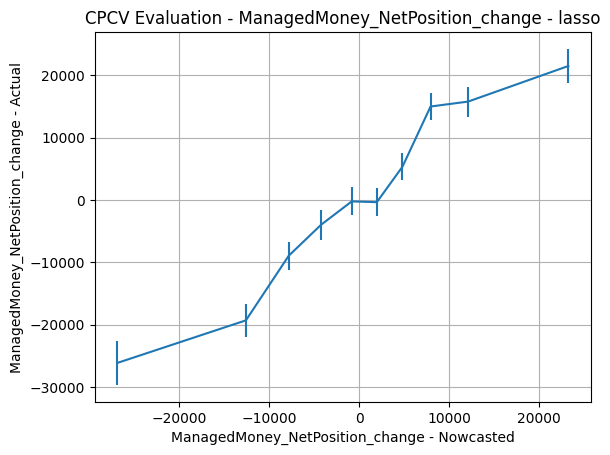

ridge: score=0.4414, params={'model': 'ridge', 'alpha': 4.473429410462694e-05}
{'alpha': 4.473429410462694e-05}


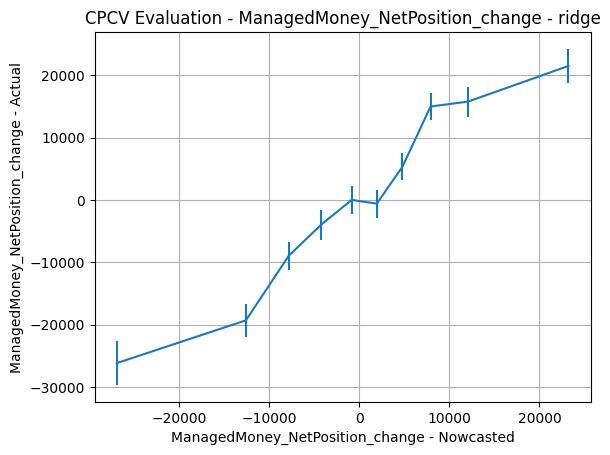

rf: score=0.5252, params={'model': 'rf', 'n_estimators': 1000, 'max_depth': 11, 'min_samples_leaf': 1, 'max_features': 'log2'}
{'n_estimators': 1000, 'max_depth': 11, 'min_samples_leaf': 1, 'max_features': 'log2'}


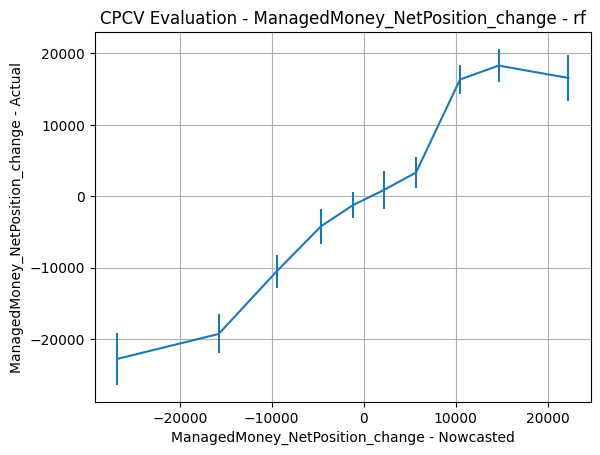

hgbm: score=0.4936, params={'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}
{'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}


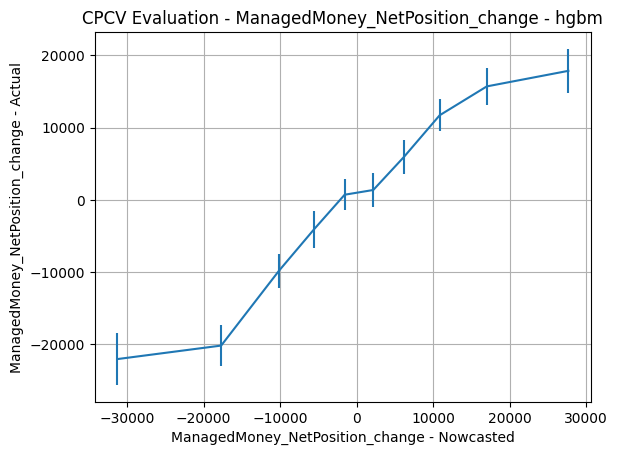

ols: score=0.4414, params={'model': 'ols'}
{}


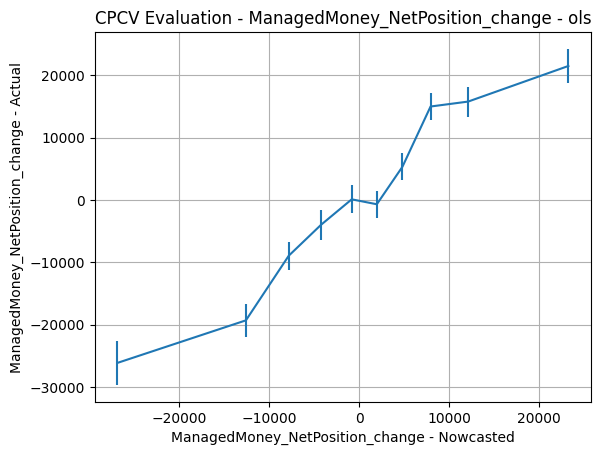

enet: score=0.4133, params={'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}
{'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}


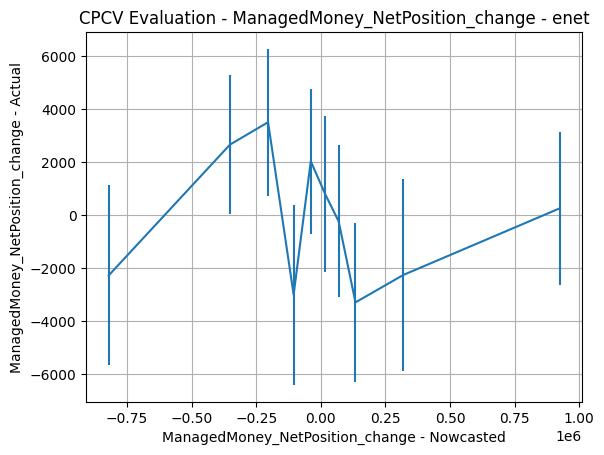

extra: score=0.4619, params={'model': 'extra', 'n_estimators': 400, 'max_depth': 22, 'min_samples_leaf': 10, 'max_features': 'log2'}
{'n_estimators': 400, 'max_depth': 22, 'min_samples_leaf': 10, 'max_features': 'log2'}


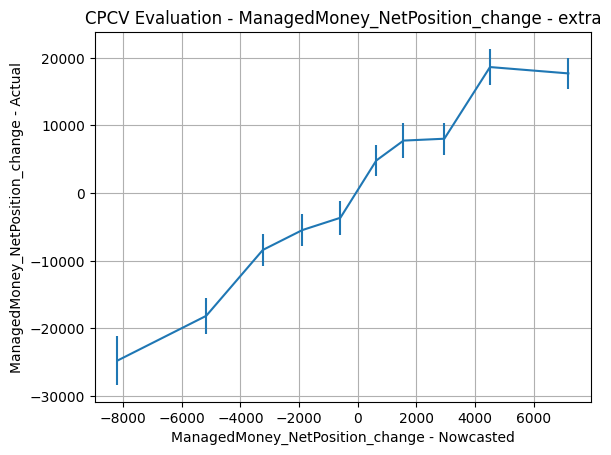

ManagedMoney_LongPosition_change
lasso: score=0.4754, params={'model': 'lasso', 'alpha': 3.5801155043912485}
{'alpha': 3.5801155043912485}


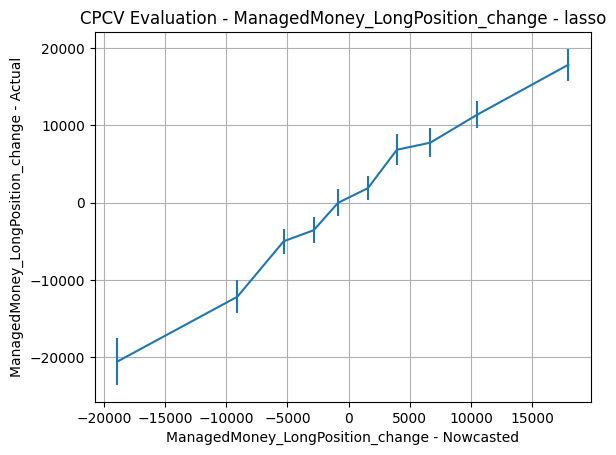

ridge: score=0.4703, params={'model': 'ridge', 'alpha': 905.0582288952139}
{'alpha': 905.0582288952139}


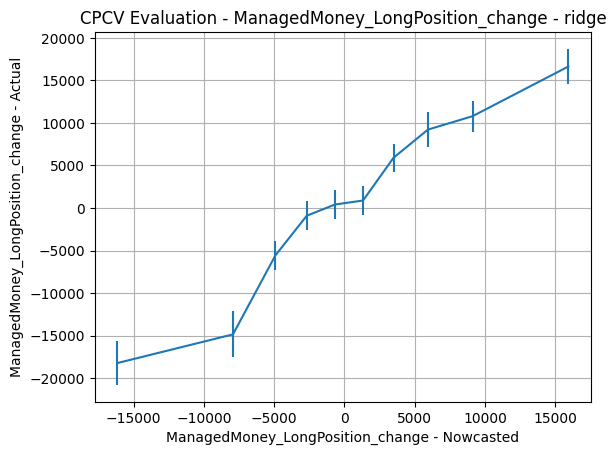

rf: score=0.5178, params={'model': 'rf', 'n_estimators': 1200, 'max_depth': 3, 'min_samples_leaf': 6, 'max_features': 'log2'}
{'n_estimators': 1200, 'max_depth': 3, 'min_samples_leaf': 6, 'max_features': 'log2'}


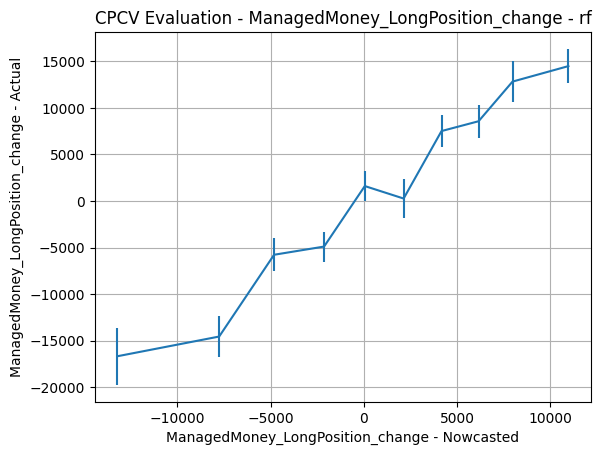

hgbm: score=0.4818, params={'model': 'hgbm', 'learning_rate': 0.0041555995699848755, 'max_depth': 3, 'max_iter': 100, 'l2_regularization': 0.024447042100329552, 'max_leaf_nodes': 24}
{'learning_rate': 0.0041555995699848755, 'max_depth': 3, 'max_iter': 100, 'l2_regularization': 0.024447042100329552, 'max_leaf_nodes': 24}


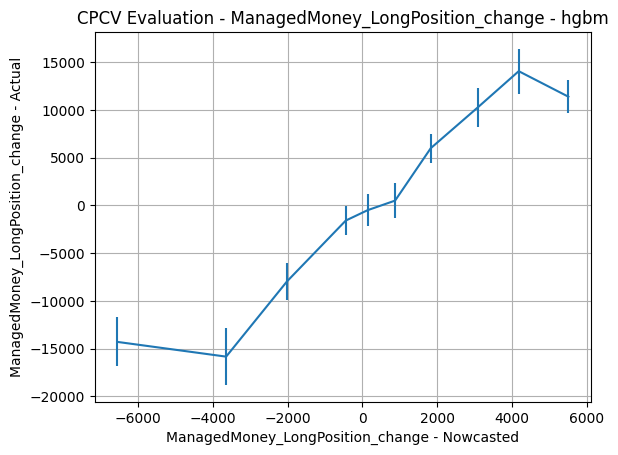

ols: score=0.4755, params={'model': 'ols'}
{}


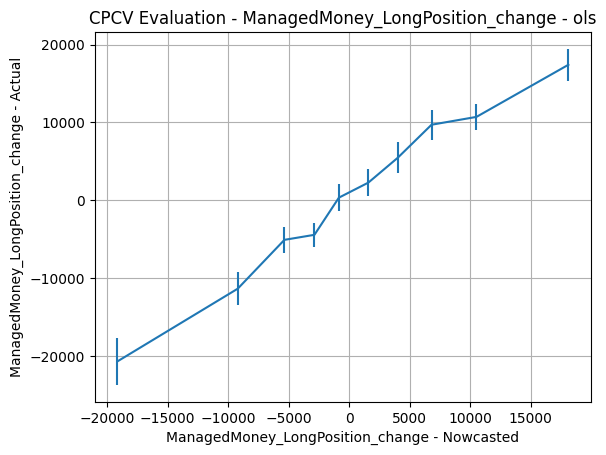

enet: score=0.4217, params={'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}
{'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}


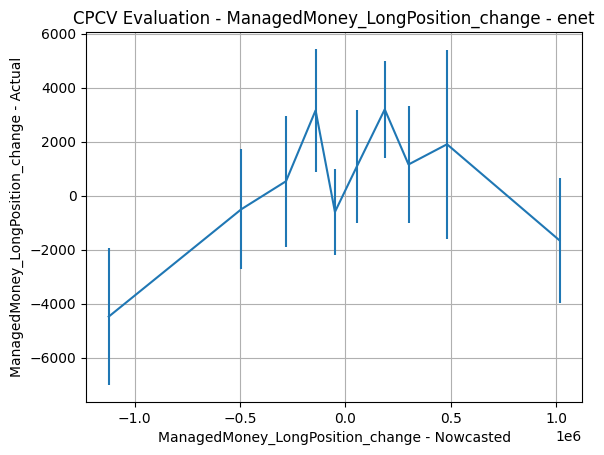

extra: score=0.5191, params={'model': 'extra', 'n_estimators': 400, 'max_depth': 27, 'min_samples_leaf': 6, 'max_features': 'sqrt'}
{'n_estimators': 400, 'max_depth': 27, 'min_samples_leaf': 6, 'max_features': 'sqrt'}


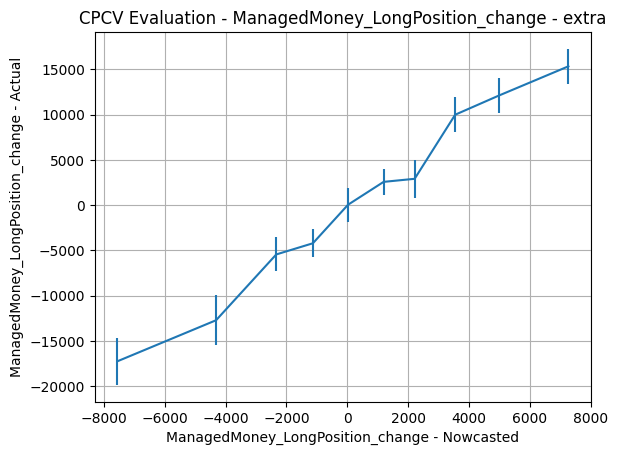

ManagedMoney_ShortPosition_change
lasso: score=0.2362, params={'model': 'lasso', 'alpha': 9.714586134002047}
{'alpha': 9.714586134002047}


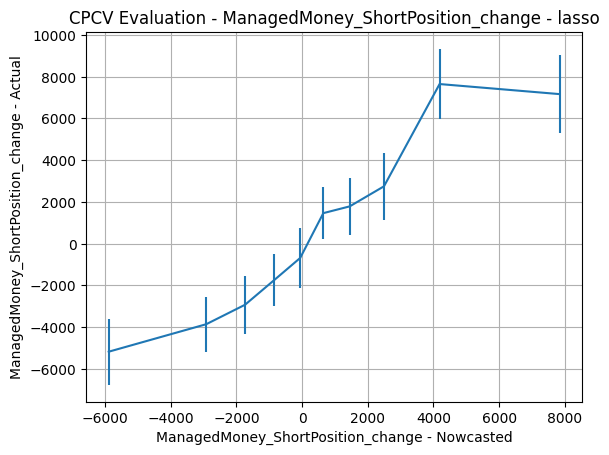

ridge: score=0.2309, params={'model': 'ridge', 'alpha': 906.6118860721004}
{'alpha': 906.6118860721004}


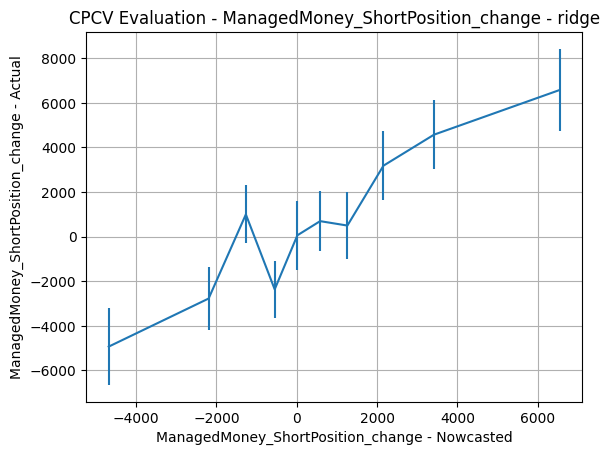

rf: score=0.3154, params={'model': 'rf', 'n_estimators': 200, 'max_depth': 30, 'min_samples_leaf': 1, 'max_features': 'log2'}
{'n_estimators': 200, 'max_depth': 30, 'min_samples_leaf': 1, 'max_features': 'log2'}


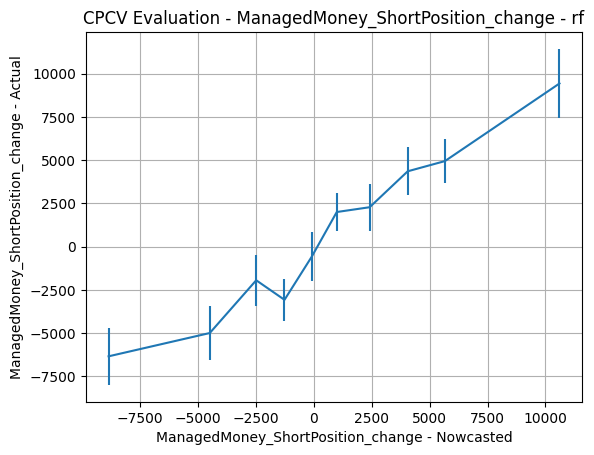

hgbm: score=0.3194, params={'model': 'hgbm', 'learning_rate': 0.0011976520841200263, 'max_depth': 10, 'max_iter': 800, 'l2_regularization': 0.9664981016783335, 'max_leaf_nodes': 21}
{'learning_rate': 0.0011976520841200263, 'max_depth': 10, 'max_iter': 800, 'l2_regularization': 0.9664981016783335, 'max_leaf_nodes': 21}


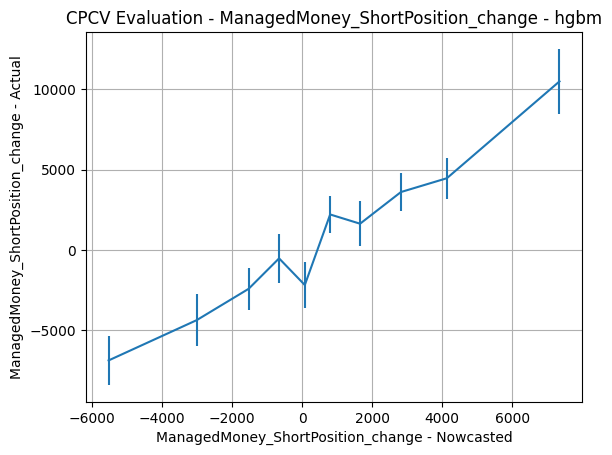

ols: score=0.2365, params={'model': 'ols'}
{}


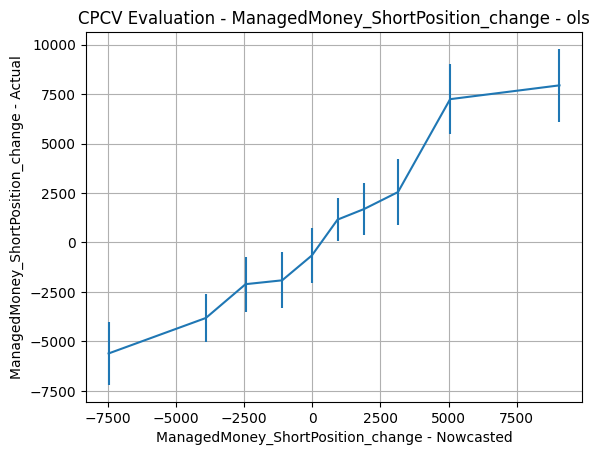

enet: score=-0.0179, params={'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}
{'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}


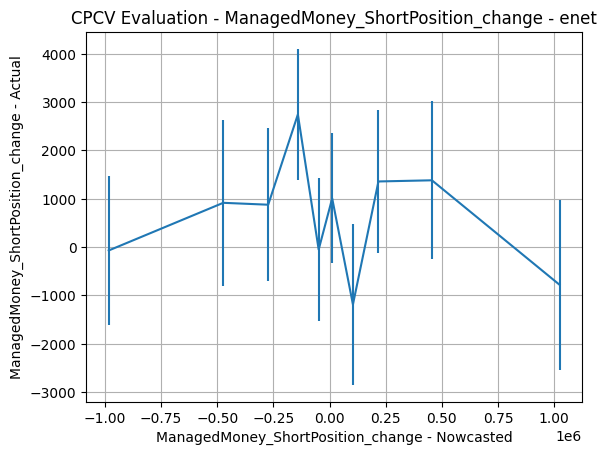

extra: score=0.3032, params={'model': 'extra', 'n_estimators': 1200, 'max_depth': 28, 'min_samples_leaf': 8, 'max_features': 'sqrt'}
{'n_estimators': 1200, 'max_depth': 28, 'min_samples_leaf': 8, 'max_features': 'sqrt'}


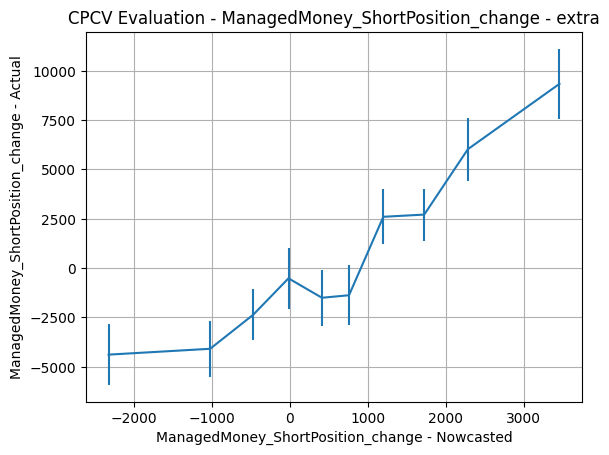

ManagedMoney_NetPosition_to_openinterest_change
lasso: score=-0.0527, params={'model': 'lasso', 'alpha': 1.156732719914599}
{'alpha': 1.156732719914599}


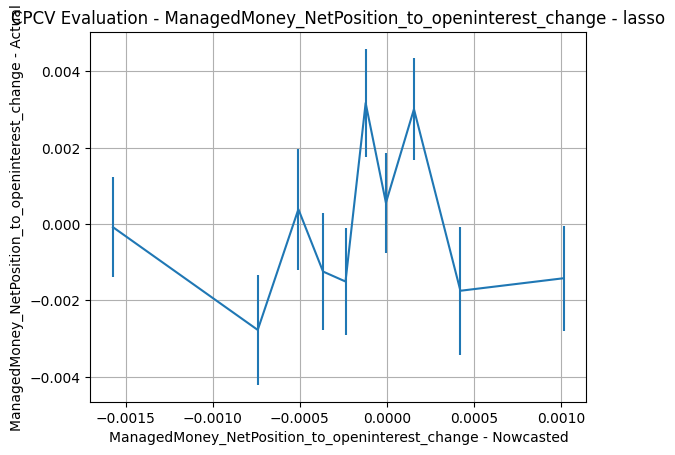

ridge: score=0.4603, params={'model': 'ridge', 'alpha': 442.5093801422389}
{'alpha': 442.5093801422389}


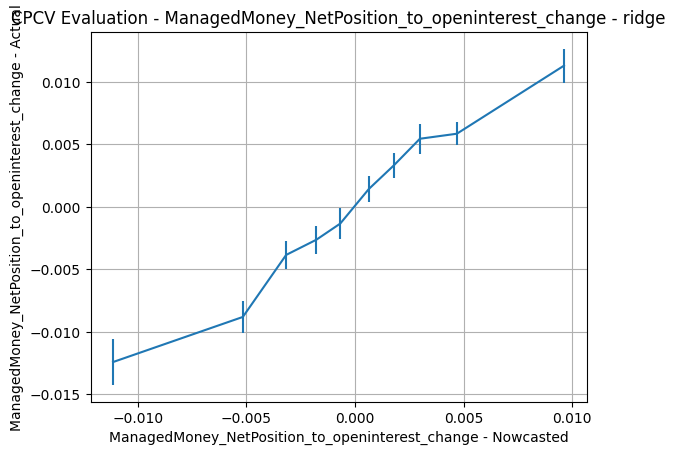

rf: score=0.5247, params={'model': 'rf', 'n_estimators': 1000, 'max_depth': 13, 'min_samples_leaf': 1, 'max_features': 'log2'}
{'n_estimators': 1000, 'max_depth': 13, 'min_samples_leaf': 1, 'max_features': 'log2'}


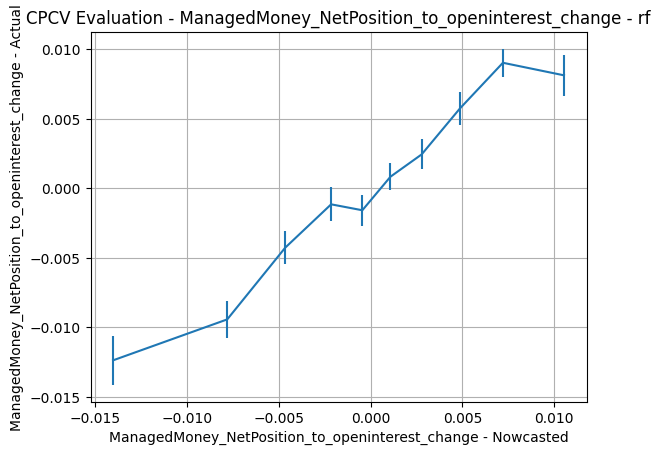

hgbm: score=0.4378, params={'model': 'hgbm', 'learning_rate': 0.28792783392692833, 'max_depth': 3, 'max_iter': 1000, 'l2_regularization': 0.8906935150540263, 'max_leaf_nodes': 244}
{'learning_rate': 0.28792783392692833, 'max_depth': 3, 'max_iter': 1000, 'l2_regularization': 0.8906935150540263, 'max_leaf_nodes': 244}


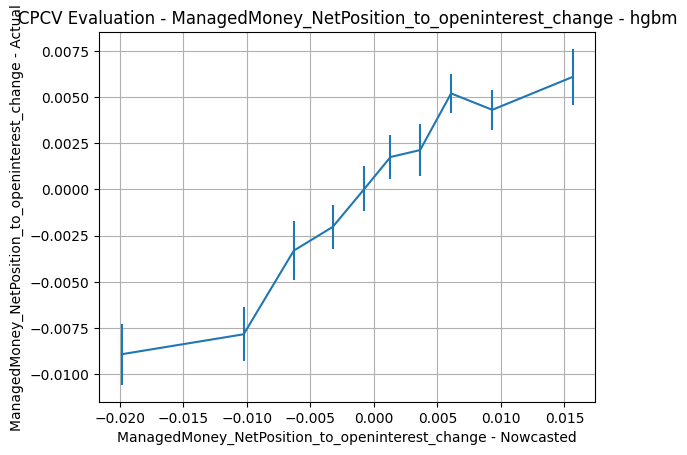

ols: score=0.4715, params={'model': 'ols'}
{}


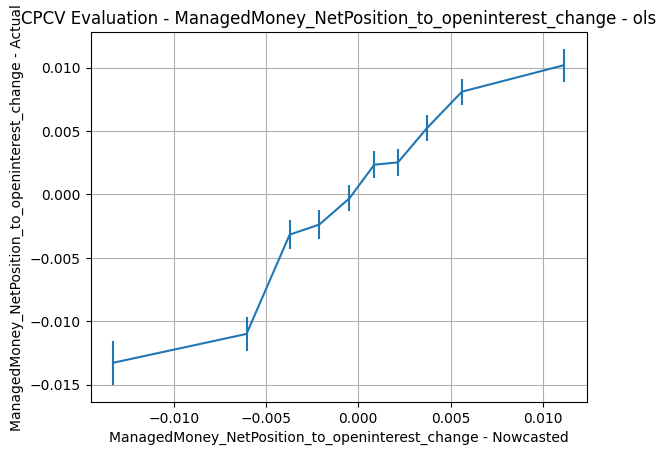

enet: score=0.2101, params={'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}
{'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}


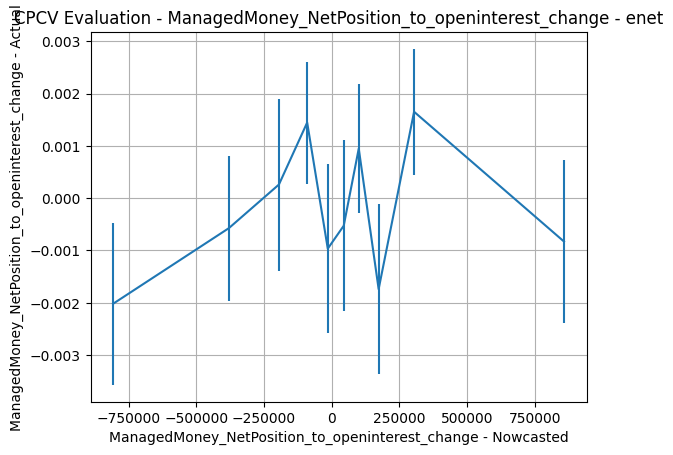

extra: score=0.4905, params={'model': 'extra', 'n_estimators': 1200, 'max_depth': 25, 'min_samples_leaf': 6, 'max_features': 'log2'}
{'n_estimators': 1200, 'max_depth': 25, 'min_samples_leaf': 6, 'max_features': 'log2'}


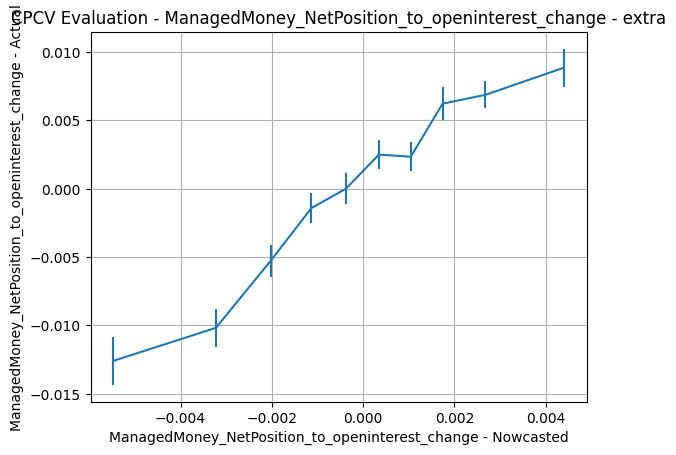

ManagedMoney_LongPosition_to_openinterest_change
lasso: score=-0.0556, params={'model': 'lasso', 'alpha': 1.156732719914599}
{'alpha': 1.156732719914599}


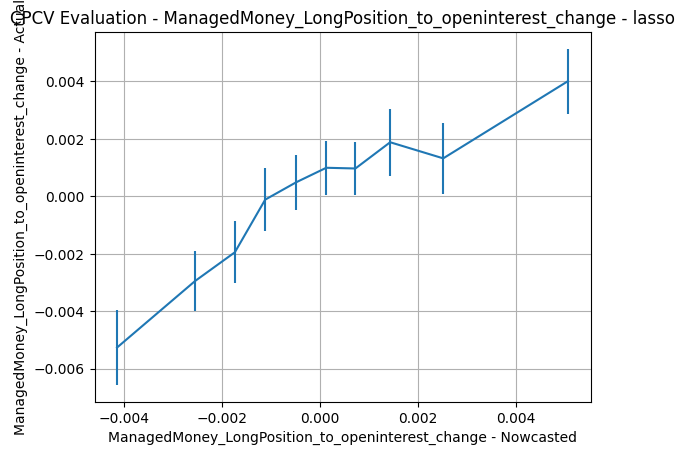

ridge: score=0.5237, params={'model': 'ridge', 'alpha': 4.473429410462694e-05}
{'alpha': 4.473429410462694e-05}


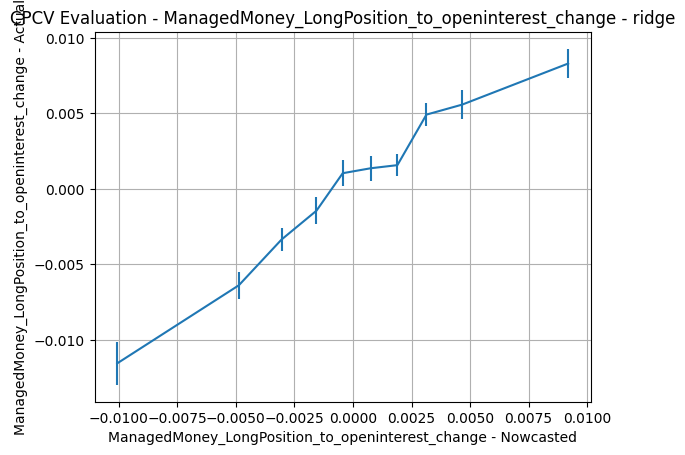

rf: score=0.5507, params={'model': 'rf', 'n_estimators': 1000, 'max_depth': 3, 'min_samples_leaf': 6, 'max_features': 'sqrt'}
{'n_estimators': 1000, 'max_depth': 3, 'min_samples_leaf': 6, 'max_features': 'sqrt'}


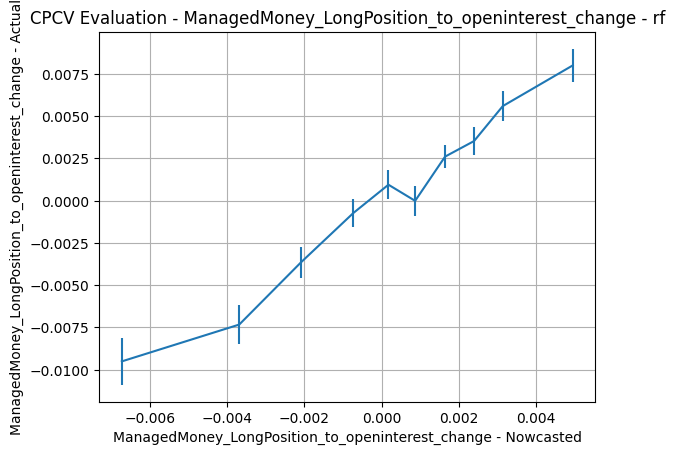

hgbm: score=0.5342, params={'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}
{'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}


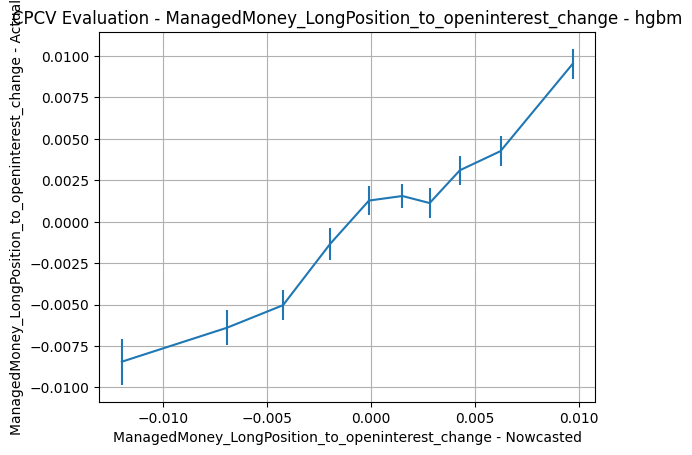

ols: score=0.5237, params={'model': 'ols'}
{}


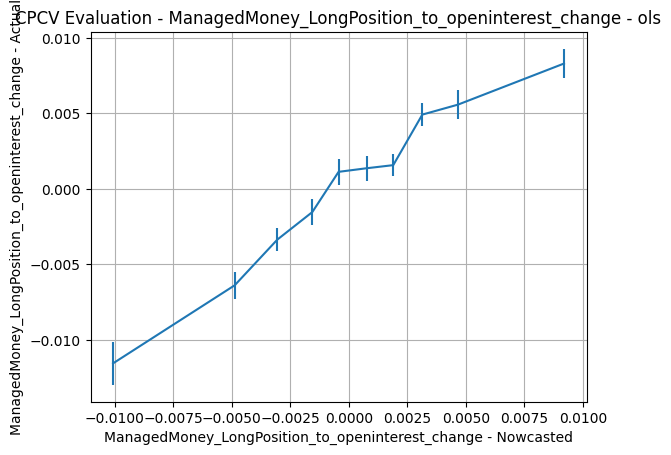

enet: score=-0.0151, params={'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}
{'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}


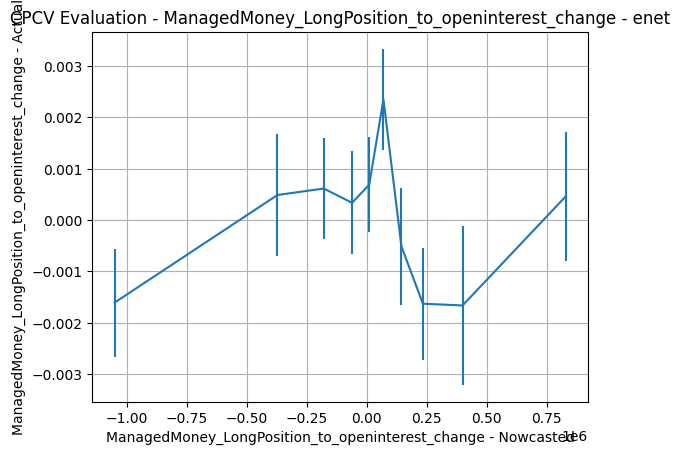

extra: score=0.5523, params={'model': 'extra', 'n_estimators': 200, 'max_depth': 24, 'min_samples_leaf': 8, 'max_features': 'sqrt'}
{'n_estimators': 200, 'max_depth': 24, 'min_samples_leaf': 8, 'max_features': 'sqrt'}


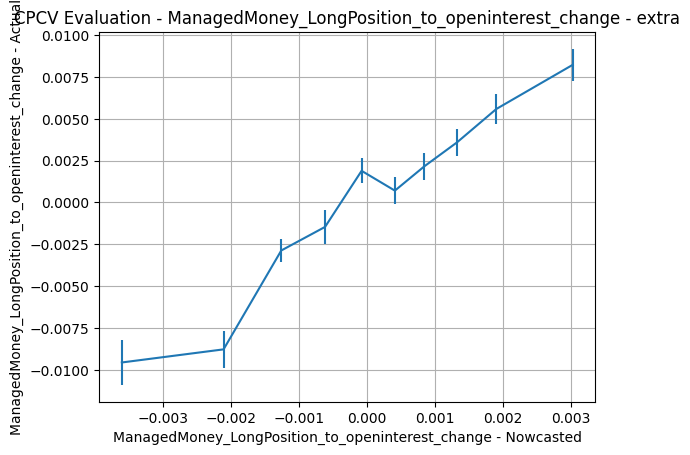

ManagedMoney_ShortPosition_to_openinterest_change
lasso: score=-0.0514, params={'model': 'lasso', 'alpha': 1.156732719914599}
{'alpha': 1.156732719914599}


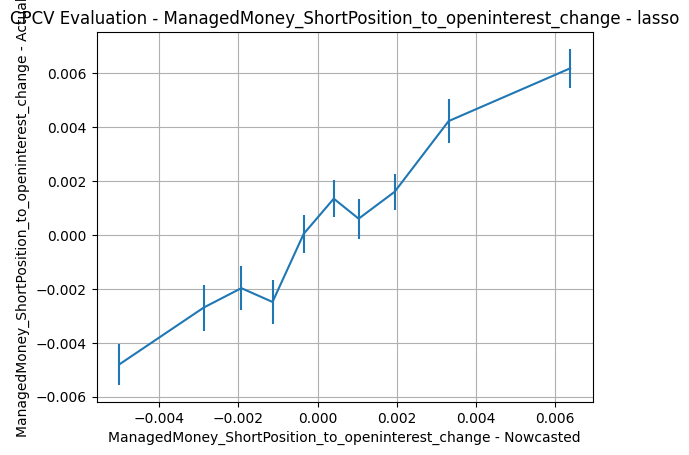

ridge: score=0.4767, params={'model': 'ridge', 'alpha': 906.6118860721004}
{'alpha': 906.6118860721004}


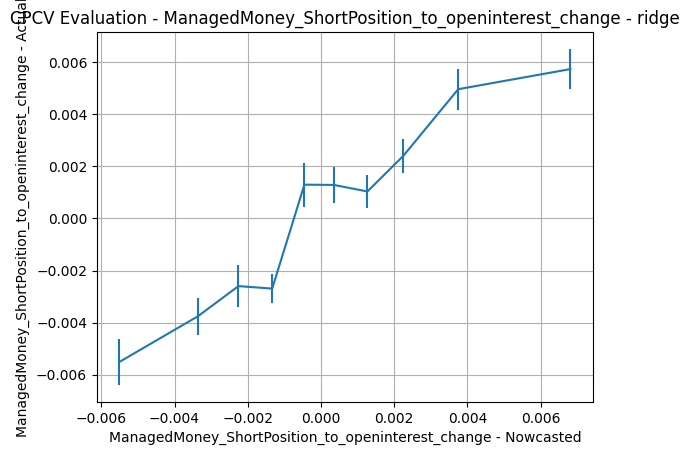

rf: score=0.5127, params={'model': 'rf', 'n_estimators': 1200, 'max_depth': 3, 'min_samples_leaf': 5, 'max_features': 'sqrt'}
{'n_estimators': 1200, 'max_depth': 3, 'min_samples_leaf': 5, 'max_features': 'sqrt'}


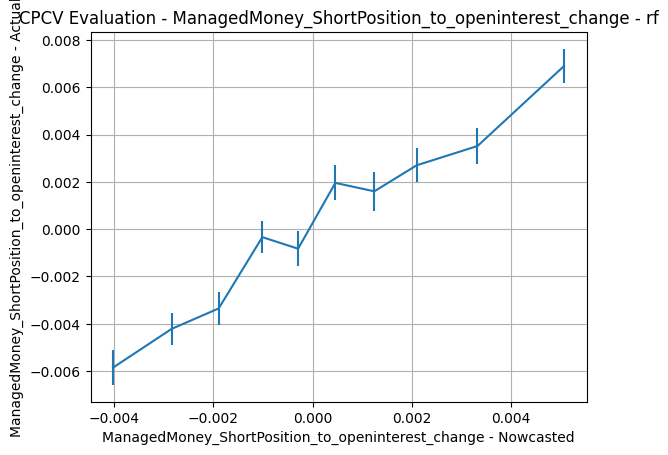

hgbm: score=0.5078, params={'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}
{'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}


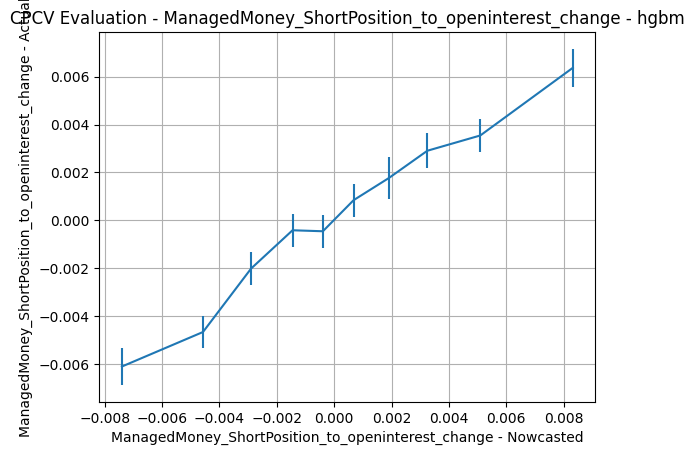

ols: score=0.4778, params={'model': 'ols'}
{}


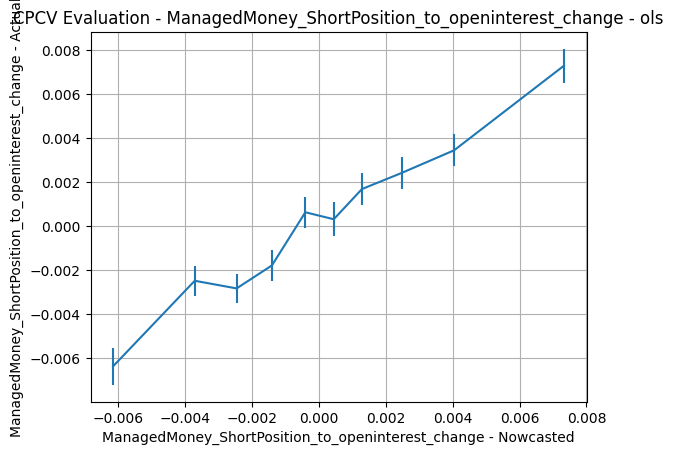

enet: score=-0.0505, params={'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}
{'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}


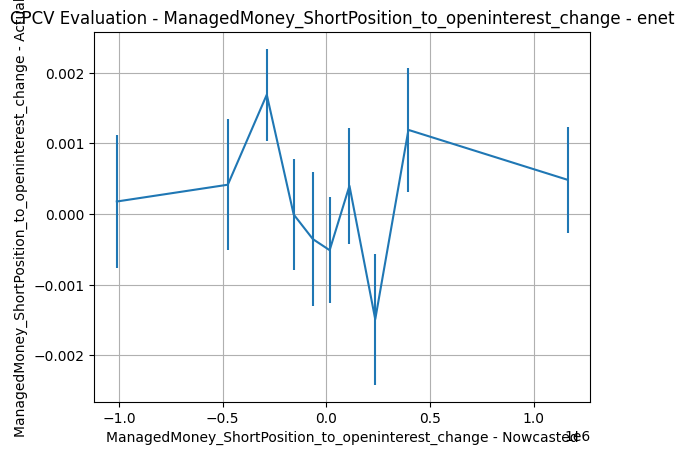

extra: score=0.4965, params={'model': 'extra', 'n_estimators': 1000, 'max_depth': 5, 'min_samples_leaf': 5, 'max_features': 'sqrt'}
{'n_estimators': 1000, 'max_depth': 5, 'min_samples_leaf': 5, 'max_features': 'sqrt'}


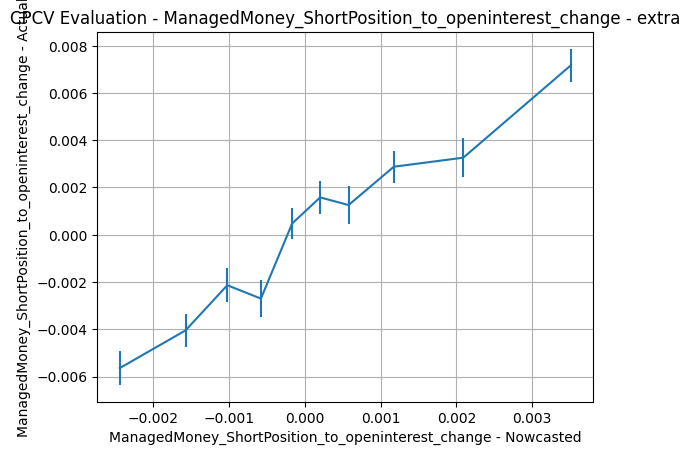

In [36]:
response_performance_map = {}
for response_name , best_model in responses_best_model.items():
    print(response_name)
    best_per_model = responses_best_per_model[response_name]
    response_performance_trail = {}
    for model_name, info in best_per_model.items():
        print(f"{model_name}: score={info['score']:.4f}, params={info['params']}")
        params = copy.deepcopy(info['params'])
        del params['model']
        print(params)
        # estimator = estimators_[model_name.lower()](**params) 

        if model_name == "enet": 
            estimator = SGDRegressor(**params)
        elif model_name == "lasso": 
            estimator = Lasso(**params)
        elif model_name == "ols": 
            estimator = LinearRegression()
        elif model_name == "ridge": 
            estimator = Ridge(**params)
        elif  model_name == "rf": 
            estimator = RandomForestRegressor(**params)
        elif model_name == "extra":
            estimator = ExtraTreesRegressor(**params)
        elif model_name == "hgbm":
            estimator = HistGradientBoostingRegressor(**params)
        

        Xy = dataset[['tradeDate']+feature_names+[response_name]].dropna()
        Xy.reset_index(drop=True, inplace= True)
        yhat = cpcv_predict( estimator ,
                             Xy[feature_names],
                             Xy[response_name],
                             cv=cv,
                                method = 'predict',
                                n_jobs=10)
        response_performance_trail[model_name] = np.corrcoef(yhat,  Xy[response_name])[0,1]
        _=plot_bin_summary_of_xy(
                    x = yhat,
                    y = Xy[response_name],
                    k= 10 )
        plt.xlabel(f'{response_name} - Nowcasted')
        plt.ylabel(f'{response_name} - Actual')
        plt.grid()
        plt.title(f'CPCV Evaluation - {response_name} - {model_name}')
        plt.show()
        plt.close()
    response_performance_map[response_name] = response_performance_trail
        
        

In [37]:
pd.DataFrame(response_performance_map).T

,lasso,ridge,rf,hgbm,ols,enet,extra
ManagedMoney_NetPosition_change,0.466270,0.466253,0.515184,0.492572,0.466271,-0.000539,0.517992
ManagedMoney_LongPosition_change,0.471035,0.460647,0.493884,0.463709,0.472355,0.043914,0.499848
ManagedMoney_ShortPosition_change,0.233335,0.168897,0.351889,0.348330,0.265638,-0.017860,0.313627
ManagedMoney_NetPosition_to_openinterest_change,-0.045256,0.432840,0.510549,0.383638,0.473884,0.019602,0.528602
ManagedMoney_LongPosition_to_openinterest_change,0.252076,0.518396,0.525525,0.504946,0.518397,0.044243,0.546508
ManagedMoney_ShortPosition_to_openinterest_change,0.426510,0.455775,0.512409,0.507767,0.477769,-0.015371,0.496469


In [38]:
final_selected_model_per_response = dict(pd.DataFrame(response_performance_map).T.idxmax(axis=1))

In [39]:
final_selected_model_per_response

{'ManagedMoney_NetPosition_change': 'extra',
 'ManagedMoney_LongPosition_change': 'extra',
 'ManagedMoney_ShortPosition_change': 'rf',
 'ManagedMoney_NetPosition_to_openinterest_change': 'extra',
 'ManagedMoney_LongPosition_to_openinterest_change': 'extra',
 'ManagedMoney_ShortPosition_to_openinterest_change': 'rf'}

In [40]:
final_selected_model_and_parameters_per_response = {}
for response_name , best_model_params in responses_best_per_model.items():
    print(response_name)
    best_model_name = final_selected_model_per_response[response_name]
    best_model_params = copy.deepcopy(best_model_params[best_model_name]['params'])
    del best_model_params['model']
    print(best_model_params)
    final_selected_model_and_parameters_per_response[response_name] = {
'model_name' : best_model_name, 
    'params': best_model_params
        
    }
    

ManagedMoney_NetPosition_change
{'n_estimators': 400, 'max_depth': 22, 'min_samples_leaf': 10, 'max_features': 'log2'}
ManagedMoney_LongPosition_change
{'n_estimators': 400, 'max_depth': 27, 'min_samples_leaf': 6, 'max_features': 'sqrt'}
ManagedMoney_ShortPosition_change
{'n_estimators': 200, 'max_depth': 30, 'min_samples_leaf': 1, 'max_features': 'log2'}
ManagedMoney_NetPosition_to_openinterest_change
{'n_estimators': 1200, 'max_depth': 25, 'min_samples_leaf': 6, 'max_features': 'log2'}
ManagedMoney_LongPosition_to_openinterest_change
{'n_estimators': 200, 'max_depth': 24, 'min_samples_leaf': 8, 'max_features': 'sqrt'}
ManagedMoney_ShortPosition_to_openinterest_change
{'n_estimators': 1200, 'max_depth': 3, 'min_samples_leaf': 5, 'max_features': 'sqrt'}


In [41]:
final_selected_model_and_parameters_per_response

{'ManagedMoney_NetPosition_change': {'model_name': 'extra',
  'params': {'n_estimators': 400,
   'max_depth': 22,
   'min_samples_leaf': 10,
   'max_features': 'log2'}},
 'ManagedMoney_LongPosition_change': {'model_name': 'extra',
  'params': {'n_estimators': 400,
   'max_depth': 27,
   'min_samples_leaf': 6,
   'max_features': 'sqrt'}},
 'ManagedMoney_ShortPosition_change': {'model_name': 'rf',
  'params': {'n_estimators': 200,
   'max_depth': 30,
   'min_samples_leaf': 1,
   'max_features': 'log2'}},
 'ManagedMoney_NetPosition_to_openinterest_change': {'model_name': 'extra',
  'params': {'n_estimators': 1200,
   'max_depth': 25,
   'min_samples_leaf': 6,
   'max_features': 'log2'}},
 'ManagedMoney_LongPosition_to_openinterest_change': {'model_name': 'extra',
  'params': {'n_estimators': 200,
   'max_depth': 24,
   'min_samples_leaf': 8,
   'max_features': 'sqrt'}},
 'ManagedMoney_ShortPosition_to_openinterest_change': {'model_name': 'rf',
  'params': {'n_estimators': 1200,
   'max_de

In [42]:
import json
with open("br_cot_mm_nowcast_selected_model_by_response.json", "w") as f:
    json.dump(final_selected_model_and_parameters_per_response, f)